In [ ]:
!pip install hopsworks

In [ ]:
!pip install pandas

In [ ]:
import hopsworks
import pandas as pd

project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store()

feature_view = fs.get_feature_view(name="lahore_aqi_view", version=1)


In [ ]:
feature_group=fs.get_feature_group(name="lahore_aqi_data", version=1)
df = feature_group.read()
print(df.head())

In [ ]:
from hsfs.feature_view import FeatureView

# Use select_all to create the query
query = feature_group.select_all()

# Now create the feature view using fs.create_feature_view (not manually constructing FeatureView)
feature_view = fs.create_feature_view(
    name="lahore_aqi_data_view",
    version=1,
    description="Feature view for AQI prediction",
    labels=["aqi"],  # ✅ make sure AQI is the correct column name
    query=query
)

In [ ]:
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()

# Load the feature view (confirm it's the right name/version)
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)


In [ ]:

training_dataset, job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="parquet",  # Use "parquet" instead of csv
    write_options={"wait_for_job": True}
)


In [ ]:
print(type(training_dataset))
print(training_dataset)

In [ ]:
import hopsworks

# Login again (if not already done)
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()

# Get your feature view
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

# Create training data (Parquet recommended)
job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="parquet",
    write_options={"wait_for_job": True}
)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)



In [ ]:
training_dataset.head()

In [ ]:
training_dataset.shape

In [ ]:
training_dataset.head(12)



---



---

Importing features from Hopsworks

In [ ]:
import hopsworks

project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store()

feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="csv",
    write_options={"wait_for_job": True}
)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)


In [ ]:
print(training_dataset.head())

In [ ]:
print(training_dataset.columns)

In [ ]:
feature_group = fs.get_feature_group(name="lahore_aqi_data", version=1)
df = feature_group.read()
print(df.columns)

In [ ]:
from hsfs.feature_view import FeatureView
import hopsworks

project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store()
# Use select_all to create the query
query = feature_group.select_all(include_primary_key=True)

# Now create the feature view using fs.create_feature_view (not manually constructing FeatureView)
feature_view = fs.create_feature_view(
    name="lahore_aqi_data_view",
    version=1,
    description="Feature view for AQI prediction",
    labels=["aqius"],  # ✅ make sure AQI is the correct column name
    query=query
)

In [ ]:
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="csv",
    write_options={"wait_for_job": True}
)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)

In [ ]:
training_dataset.head()

In [ ]:
!pip install --upgrade hopsworks pyhudi duckdb
!pip install --upgrade pandas pyarrow

In [ ]:
import hopsworks

project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store(name="Lahore_aqi")

feature_group = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = feature_group.select_all(include_primary_key=True).read()
print(df.columns)
print(df.head())

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.17s) 
Index(['timestamp', 'aqius', 'main_pollutant', 'temperature', 'humidity',
       'wind_speed', 'aqi', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'no', 'o3',
       'nh3', 'hour', 'dayofweek', 'target_aqi'],
      dtype='object')
                         timestamp  aqius main_pollutant  temperature  \
0 2025-07-09 13:34:58.628647+00:00     66             p2         32.0   
1 2025-07-10 10:24:06.927451+00:00    123             p2         26.0   
2 2025-07-07 04:35:37.585346+00:00    153             p2         26.0   
3 2025-07-09 11:19:07.207907+00:00     56             p2         32.0   
4 2025-07-08 22:21:11.074569+00:00     71             p2         31.0   

   humidity  wind_speed    aqi  pm2_5   pm10   no2     so2  co     no     o3  \
0      61.0        3.08  16.55  29.76  12.15  2.38  329.15   0  35.96  14

In [ ]:
train_df, _ = feature_view.get_training_data(training_dataset_version=1)
print(train_df.columns)

NameError: name 'feature_view' is not defined

In [ ]:
query = feature_group.select_all(include_primary_key=True)
df = query.read()

print(df.columns)
print(df.head())


Training a model
---



---



In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



X = df.drop(columns=["timestamp", "aqi"])
Y= df["aqi"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

y_predictions=model.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, y_predictions))
print("MSE:", mean_squared_error(Y_test, y_predictions))
mse = mean_squared_error(Y_test, y_predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R2 Score:", r2_score(Y_test, y_predictions))


Replacing Csv

---



---



In [ ]:
!pip install pandas

In [ ]:
!pip install hopsworks

In [ ]:
!pip install confluent-kafka

In [ ]:
import hopsworks
import pandas as pd

df = pd.read_csv("/content/lahore_aqi_features.csv")

df["timestamp"] = pd.to_datetime(df["timestamp"])


project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()

feature_group = fs.create_feature_group(
    name="lahore_aqi_data",
    version=1,
    description="Lahore AQI data",
    primary_key=["timestamp"],
    event_time="timestamp",
    online_enabled=False
)

feature_group.insert(df)


In [ ]:
from hsfs.feature_view import FeatureView
import hopsworks


project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store()

feature_group = fs.get_feature_group(name="lahore_aqi_data", version=1)

query = feature_group.select_all(include_primary_key=True)

# Now create the feature view using fs.create_feature_view (not manually constructing FeatureView)
feature_view = fs.create_feature_view(
    name="lahore_aqi_data_view",
    version=1,
    description="Feature view for AQI prediction",
    labels=["aqi"],
    query=query
)

In [ ]:
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="csv",
    write_options={"wait_for_job": True},
    statistics_config={"enabled": True}

)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)

In [ ]:
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)
print(type(training_dataset))

print(training_dataset.shape)

In [ ]:
training_dataset.head(6)

In [ ]:
fg=fs.get_feature_group(name="lahore_aqi_data", version=1)
print(df.shape)
print(df.head())
print(df.tail())

In [ ]:
feature_group = fs.get_feature_group(name="lahore_aqi_data", version=1)
query = feature_group.select_all()  # Make sure it selects everything

from hsfs.feature_view import FeatureView

feature_view = fs.create_feature_view(
    name="lahore_aqi_data_view",
    version=1,
    description="Feature View with complete data",
    labels=["aqi"],
    query=query
)


In [ ]:
feature_view = fs.get_feature_view(name="lahore_aqi_data_view", version=1)

job = feature_view.create_training_data(
    description="Training dataset for Lahore AQI",
    data_format="csv",
    write_options={"wait_for_job": True},
    statistics_config={"enabled": True}

)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1)

In [ ]:

print(training_dataset.shape)

Cleaning data

---



---



In [ ]:
import pandas as pd

df=pd.read_csv("/content/lahore_aqi_features.csv")
print(df.columns)
print(df.shape)
print(df.head())
print(df.tail())

In [ ]:
print(df.isnull().sum())

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.duplicated().sum())  # Total duplicate rows

In [ ]:
df.info()
df.describe()

In [ ]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

Training Data


---



---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


target="aqi"

X=df.drop(columns=["timestamp",target])
Y=df[target]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,Y_train)

y_predictions=model.predict(X_test)

mse = mean_squared_error(Y_test, y_predictions)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

In [ ]:
#print(X_train.std())
#print(X_test.std())
print(y_predictions.std())

Model Registery


---



---



In [ ]:
!pip install joblib

Training Data

---



---



In [ ]:
!pip install hopsworks


In [ ]:
import hopsworks
import os

project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC", project="Lahore_aqi")
fs = project.get_feature_store()

feature_view = fs.get_feature_view(name="lahore_aqi_view", version=1)
training_dataset = feature_view.get_training_data(training_dataset_version=1)[0]  #  fetch latest
print(training_dataset.head(10))

In [ ]:
training_dataset = feature_view.get_training_data(training_dataset_version=1, include_labels=True)[0]
print(training_dataset.head(10))
print(df.columns)


In [ ]:
!pip install pyarrow


In [ ]:
feature_view = fs.get_feature_view(name="lahore_aqi_view", version=1)
print(feature_view.labels)

In [ ]:
print(type(training_dataset))


In [ ]:
!pip install "hopsworks[python]" pyarrow


In [ ]:
import hopsworks

project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC", project="Lahore_aqi")
fs = project.get_feature_store()

# Get the feature view
feature_view = fs.get_feature_view(name="lahore_aqi_view", version=1)

training_dataset, _ = feature_view.get_training_data(training_dataset_version=1, include_labels=True)

# This is a pandas DataFrame already
df = training_dataset

# Now use df directly
print(df.head(20))


Accessed Data from Feature Group


---



---



In [ ]:
import hopsworks

project = hopsworks.login(
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",  # Replace with your real API key or use environment variable
    project="Lahore_aqi"
)
fs = project.get_feature_store()

fg = fs.get_feature_group(name="lahore_aqi_group", version=1)

In [ ]:
df = fg.select_all().read()

print(df.columns)
print(df.head(23))

EDA Analysis


---



---



In [ ]:
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.dropna(inplace=True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Training

---



---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select features and target
features = ['temperature', 'humidity', 'wind_speed', 'aqius']
target = 'target_aqi'

X = df[features]
y = df[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for Ridge & Deep Learning models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Step 1: Define features and target
features = ['temperature', 'humidity', 'wind_speed', 'aqius']
target = 'target_aqi'

X = df[features]
y = df[target]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Scale features (StandardScaler for X)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Scale target (MinMaxScaler for y)
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Step 5: Build TensorFlow Model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])

# Step 6: Compile model
optimizer = Adam(learning_rate=0.001)
tf_model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Step 7: Train the model
tf_model.fit(X_train_scaled, y_train_scaled, epochs=200, batch_size=32, verbose=0)

# Step 8: Make predictions
tf_preds_scaled = tf_model.predict(X_test_scaled)
tf_preds = y_scaler.inverse_transform(tf_preds_scaled).flatten()

# Step 9: Evaluate performance
rmse = np.sqrt(mean_squared_error(y_test, tf_preds))
mae = mean_absolute_error(y_test, tf_preds)
r2 = r2_score(y_test, tf_preds)

# Step 10: Print results
print("\n📊 TensorFlow Model (Improved) Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE:  {mae:.2f}")
print(f"R²:   {r2:.2f}")


In [ ]:
import numpy as np

def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.2f}")
    print("-" * 40)

evaluate(y_test, rf_preds, "Random Forest Regressor")
evaluate(y_test, ridge_preds, "Ridge Regressor")
evaluate(y_test, tf_preds, "TensorFlow Model")

Upload in Model Registery

---



---



In [ ]:
!pip install joblib

In [ ]:
!pip install hopsworks

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [ ]:
rf_rmse, rf_mae, rf_r2 = evaluate_model(y_test, rf_preds)
ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(y_test, ridge_preds)
tf_rmse, tf_mae, tf_r2 = evaluate_model(y_test,tf_preds)

In [ ]:
metrics = {
    "RandomForest": {"r2": rf_r2, "model": rf_model},
    "Ridge": {"r2": ridge_r2, "model": ridge_model},
    "TensorFlow": {"r2": tf_r2, "model": tf_model}
}

# Pick the model with the highest R²
best_model_name = max(metrics, key=lambda name: metrics[name]["r2"])
best_model = metrics[best_model_name]["model"]

print(f"✅ Best model based on R²: {best_model_name} (R² = {metrics[best_model_name]['r2']:.2f})")


In [ ]:
!pip install scikit-learn

In [ ]:
import hopsworks
import joblib
import os
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🔐 Login to Hopsworks
project = hopsworks.login(
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",
    project="Lahore_aqi"
)
mr = project.get_model_registry()

# 📁 Save best model to local directory
model_dir = "best_model"
os.makedirs(model_dir, exist_ok=True)

if best_model_name == "TensorFlow":
    model_path = os.path.join(model_dir, "model.keras")
    best_model.save(model_path)
else:
    model_path = os.path.join(model_dir, "model.pkl")
    joblib.dump(best_model, model_path)

# 📊 Recalculate metrics for best model
if best_model_name == "RandomForest":
    preds = rf_model.predict(X_test)
elif best_model_name == "Ridge":
    preds = ridge_model.predict(X_test_scaled)
else:
    preds = tf_model.predict(X_test_scaled).flatten()

rmse = np.sqrt(mean_squared_error(y_test, preds))
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

# 🗂️ Register model as `"ridge_aqi_model"` (name is fixed)
model = mr.python.create_model(
    name="ridge_aqi_model",
    metrics={"rmse": rmse, "mae": mae, "r2": r2},
    description=f"Best model auto-selected: {best_model_name}"
)

# 📤 Upload to model registry
model.save(os.path.abspath(model_path))

print(f"✅ Model '{best_model_name}' registered as 'ridge_aqi_model' with R² = {r2:.2f}")


In [ ]:
import hopsworks

project=hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs=project.get_feature_store()

fg=fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

print(df.columns)
print(df.head(62))

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.shape)

In [ ]:
!pip install confluent-kafka

In [ ]:
import hopsworks
import pandas as pd
import numpy as np
import os

# Step 1: Login using API key
api_key = "RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC"
project = hopsworks.login(api_key_value=api_key)
fs = project.get_feature_store()

# Step 2: Load and clean CSV
df = pd.read_csv("/content/lahore_aqi_features.csv")

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Drop rows with invalid or missing timestamps
df.dropna(subset=["timestamp"], inplace=True)

# Clean main_pollutant
df['main_pollutant'] = df['main_pollutant'].astype(str).str.strip().replace("", np.nan)
df.dropna(subset=["main_pollutant"], inplace=True)

# Drop any rows with other nulls
#df.dropna(inplace=True)

# Sort by timestamp (optional but good practice)
df.sort_values("timestamp", inplace=True)

# Enforce data types explicitly for Hopsworks compatibility
df = df.astype({
    "aqius": "int64",
    "main_pollutant": "string",
    "temperature": "float64",
    "humidity": "float64",
    "wind_speed": "float64",
    "aqi": "float64",
    "pm2_5": "float64",
    "pm10": "float64",
    "no2": "float64",
    "so2": "float64",
    "co": "int64",
    "no": "float64",
    "o3": "float64",
    "nh3": "float64",
    "hour": "int64",
    "dayofweek": "int64",
    "target_aqi": "float64"
})

print("Shape of data before insert:", df.shape)


# Step 3: Create or get feature group
fg = fs.get_or_create_feature_group(
    name="lahore_aqi_group",
    version=1,
    primary_key=["timestamp"],
    description="Lahore AQI daily updated dataset",
    event_time="timestamp"
)

# Step 4: Insert cleaned data
fg.insert(df, write_options={"wait_for_job": True})  # Don't overwrite

print("✅ Feature group updated successfully!")

In [ ]:
import hopsworks
from datetime import datetime

# Connect to Hopsworks
project = hopsworks.login()
fs = project.get_feature_store()

# Get your feature group
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)

# 1. Check creation/update time (NEW METHOD)
print(f"Feature group created: {fg.created}")
print(f"Last updated: {fg.last_updated}")

# 2. Check if feature group exists and is accessible
print(f"Feature group exists: {fg.exists()}")
print(f"Feature group accessible: {fg.is_accessible()}")

# 3. Get statistics (correct way)
stats = fg.get_statistics()
print(f"Statistics computed at: {stats.computation_time}")
print(f"Row count: {stats.row_count}")

# 4. Verify data content
try:
    df = fg.read()
    print(f"\nData preview ({len(df)} rows):")
    print(df.head())
except Exception as e:
    print(f"\nError reading data: {e}")

  EDA

---



---



In [ ]:
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 584.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import hopsworks

project = hopsworks.login(
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",  # Replace with your real API key or use environment variable
    project="Lahore_aqi"
)
fs = project.get_feature_store()

fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df= fg.select_all().read()
print(df.columns)
print(df.head())



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.39s) 
Index(['timestamp', 'aqius', 'main_pollutant', 'temperature', 'humidity',
       'wind_speed', 'aqi', 'pm2_5', 'pm10', 'no2', 'so2', 'co', 'no', 'o3',
       'nh3', 'hour', 'dayofweek', 'target_aqi'],
      dtype='object')
                         timestamp  aqius main_pollutant  temperature  \
0 2025-07-09 13:34:58.628647+00:00     66             p2         32.0   
1 2025-07-10 10:24:06.927451+00:00    123             p2         26.0   
2 2025-07-07 04:35:37.585346+00:00    153             p2         26.0   
3 2025-07-09 11:19:07.207907+00:00     56             p2         32.0   
4 2025-07-08 22:21:11.074569+00:00     71             p2         31.0   

   humidity  wind_speed    aqi  pm2_5   pm10   no2     so2  co     no     o3  \
0      61.0        3.08  16.55  29.76  12.15  2.38  329.15   0  35.96  14.10   
1      82.0 

In [ ]:
x=df.groupby(['aqius']).agg({"aqius":"count"})
print(x)

       aqius
aqius       
44         1
53         2
55         2
56         3
58         2
...      ...
185        2
186        2
188        1
192        2
194        1

[116 rows x 1 columns]


In [ ]:
print(df.isnull().sum())

timestamp           0
aqius               0
main_pollutant      0
temperature         0
humidity            0
wind_speed          0
aqi                 0
pm2_5               0
pm10                0
no2                 0
so2                 0
co                  0
no                  0
o3                  0
nh3               878
hour                0
dayofweek           0
target_aqi          1
dtype: int64


In [ ]:
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

In [ ]:
print(df.isnull().sum())

timestamp         0
aqius             0
main_pollutant    0
temperature       0
humidity          0
wind_speed        0
aqi               0
pm2_5             0
pm10              0
no2               0
so2               0
co                0
no                0
o3                0
hour              0
dayofweek         0
target_aqi        0
dtype: int64


In [ ]:
print(df.shape)

(877, 17)


In [ ]:
print(df.head())

                         timestamp  aqius main_pollutant  temperature  \
0 2025-07-09 13:34:58.628647+00:00     66             p2         32.0   
1 2025-07-10 10:24:06.927451+00:00    123             p2         26.0   
2 2025-07-07 04:35:37.585346+00:00    153             p2         26.0   
3 2025-07-09 11:19:07.207907+00:00     56             p2         32.0   
4 2025-07-08 22:21:11.074569+00:00     71             p2         31.0   

   humidity  wind_speed    aqi  pm2_5   pm10   no2     so2  co     no     o3  \
0      61.0        3.08  16.55  29.76  12.15  2.38  329.15   0  35.96  14.10   
1      82.0        2.13  10.26  22.84   4.52  1.56  198.29   0  61.99   6.88   
2      77.0        3.48  14.07  33.77   8.98  4.19  220.03   0  34.59   6.13   
3      59.0        2.91  14.16  31.31   6.87  2.30  225.66   0  48.30  11.52   
4      65.0        4.26  17.08  30.36  12.83  2.84  384.91   0  26.99  10.16   

   hour  dayofweek  target_aqi  
0    13          2        71.0  
1    10       

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import datetime
df["hour"]=df["timestamp"].dt.hour
df["dayofweek"]=df["timestamp"].dt.dayofweek
df["day"]=df["timestamp"].dt.day
df["month"]=df["timestamp"].dt.month
df["year"]=df["timestamp"].dt.year

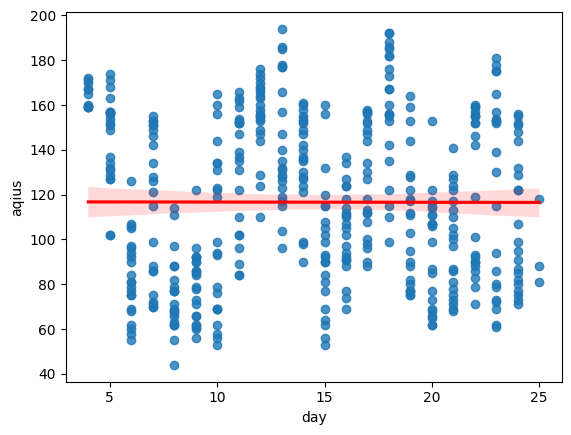

In [ ]:
sns.regplot(data=df,x="day",y="aqius",line_kws={"color":"red"})
plt.show()

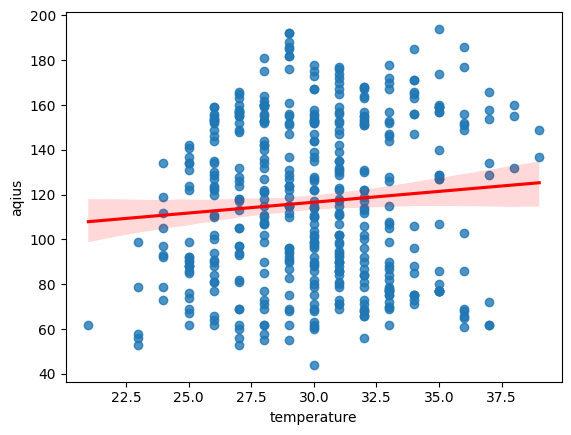

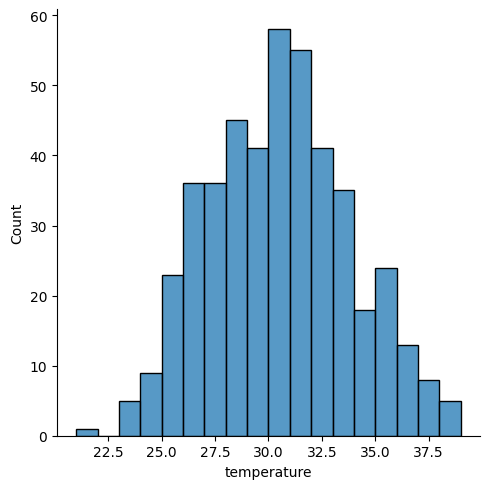

In [ ]:
sns.regplot(data=df, x='temperature', y='aqius',line_kws={"color":"red"})
plt.show()

sns.displot(df['temperature'])
plt.show()

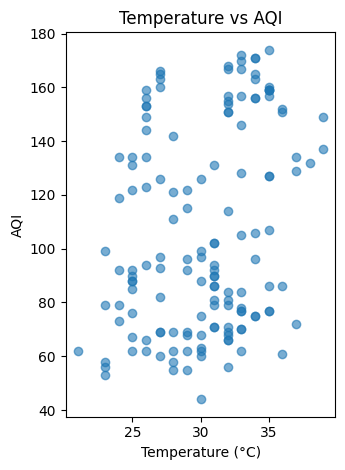

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(df['temperature'], df['aqius'], alpha=0.6)
plt.title('Temperature vs AQI')
plt.xlabel('Temperature (°C)')
plt.ylabel('AQI')
plt.tight_layout()
plt.show()

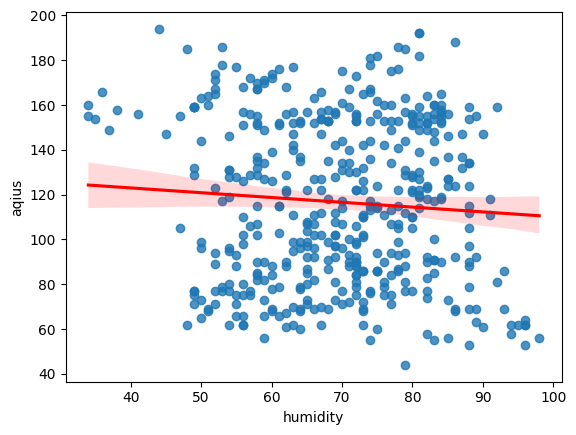

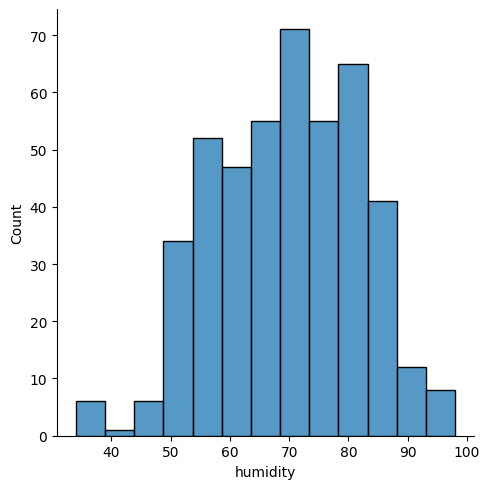

In [ ]:
sns.regplot(x='humidity', y='aqius', data=df, line_kws={'color': 'red'})
plt.show()
sns.displot(df['humidity'])
plt.show()

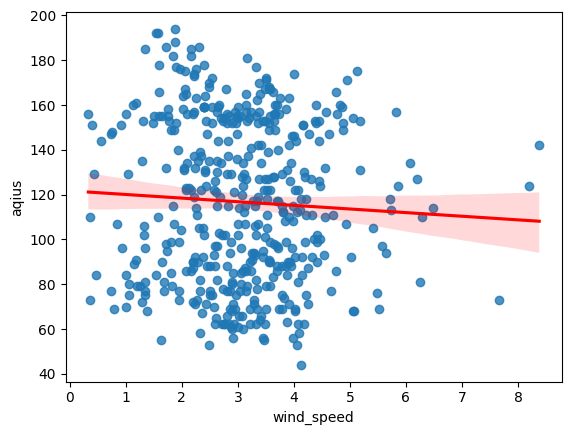

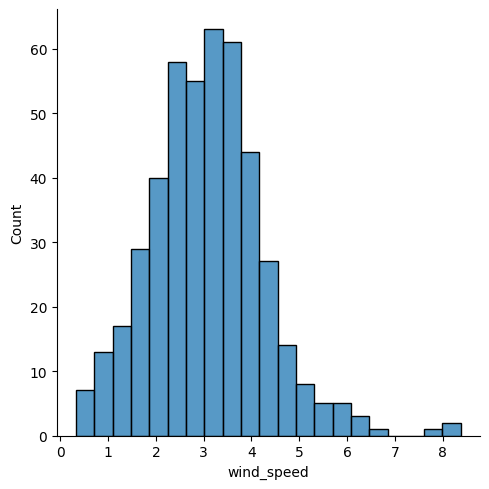

In [ ]:
sns.regplot(x='wind_speed', y='aqius', data=df, line_kws={'color': 'red'})
plt.show()

sns.displot(df['wind_speed'])
plt.show()

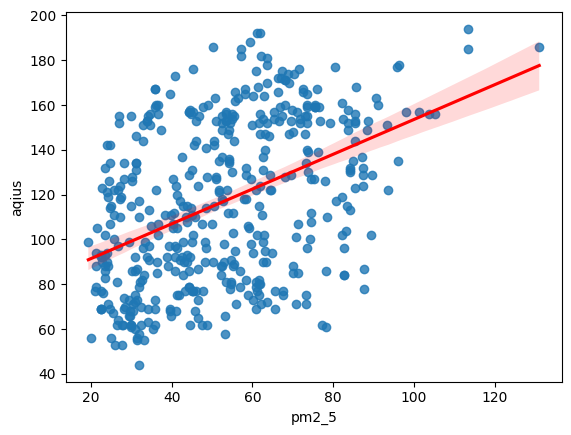

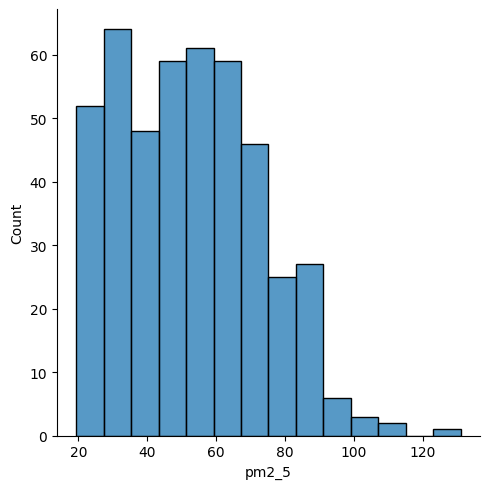

In [ ]:
#dependency existence
#straight line: no need for that point

sns.regplot(data=df, x='pm2_5', y='aqius',line_kws={"color":"red"})
plt.show()

sns.displot(df['pm2_5'])
plt.show()

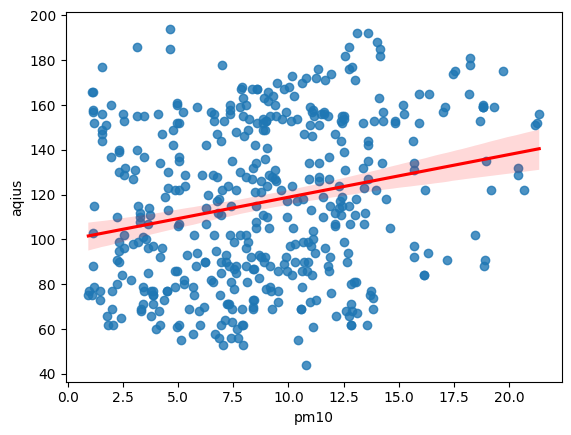

In [ ]:
sns.regplot(data=df, x='pm10', y='aqius',line_kws={"color":"red"})
plt.show()

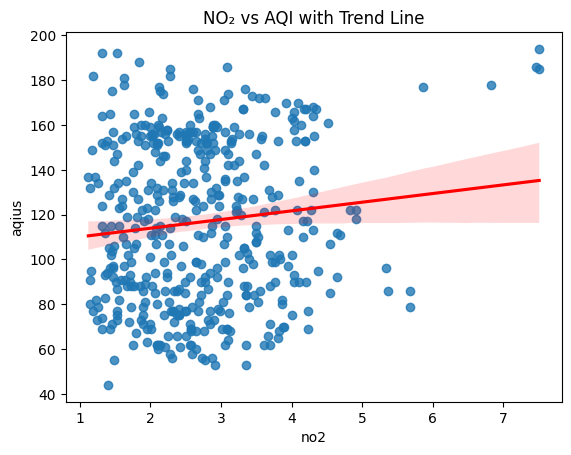

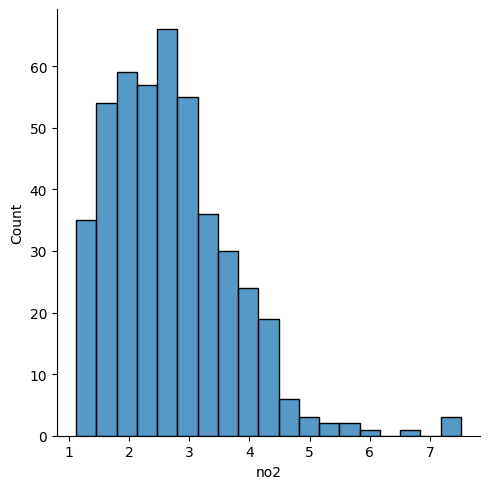

In [ ]:
sns.regplot(x='no2', y='aqius', data=df, line_kws={'color': 'red'})
plt.title('NO₂ vs AQI with Trend Line')
plt.show()

sns.displot(df["no2"])
plt.show()

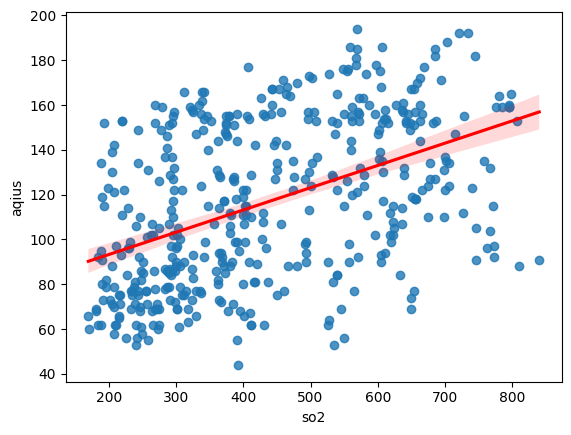

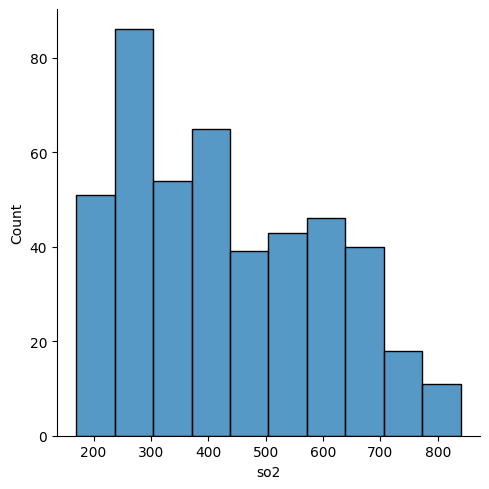

In [ ]:
sns.regplot(x='so2', y='aqius', data=df, line_kws={'color': 'red'})
plt.show()

sns.displot(df["so2"])
plt.show()

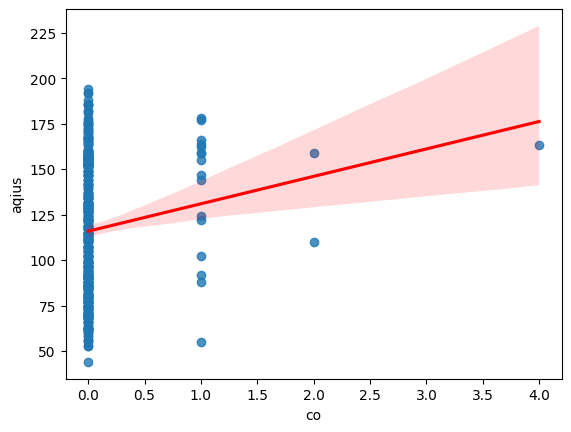

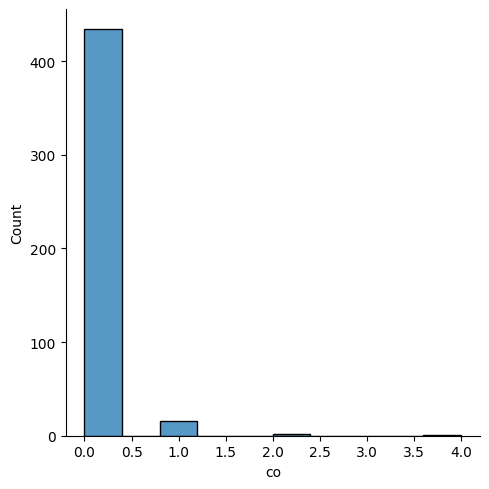

In [ ]:
sns.regplot(data=df, x='co', y='aqius',line_kws={"color":"red"})
plt.show()

sns.displot(df["co"])
plt.show()

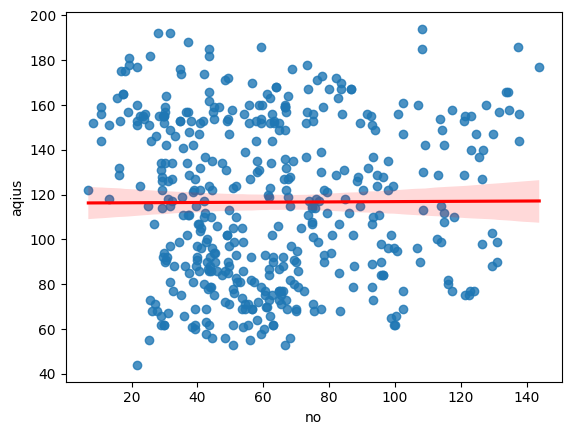

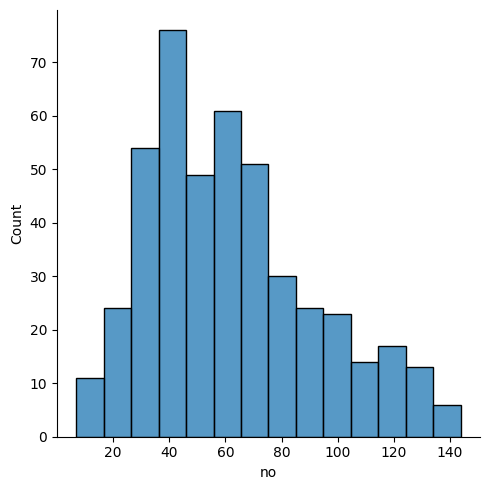

In [ ]:
sns.regplot(x='no', y='aqius', data=df, line_kws={'color': 'red'})
plt.show()

sns.displot(df["no"])
plt.show()

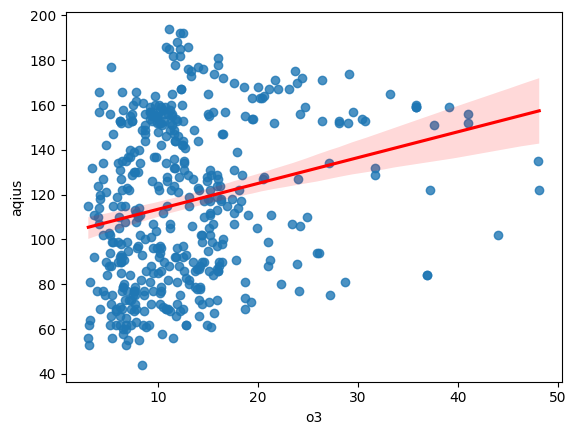

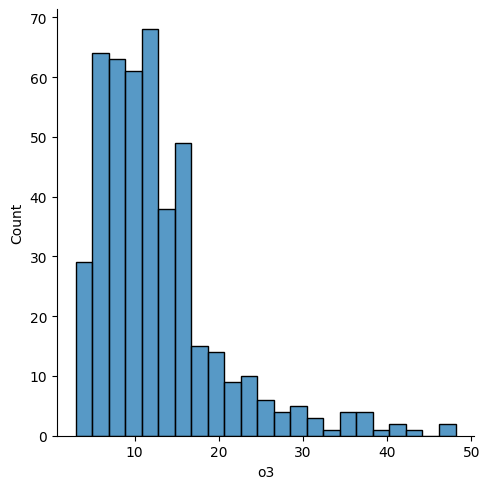

In [ ]:
sns.regplot(x='o3', y='aqius', data=df, line_kws={'color': 'red'})
plt.show()

sns.displot(df["o3"])
plt.show()

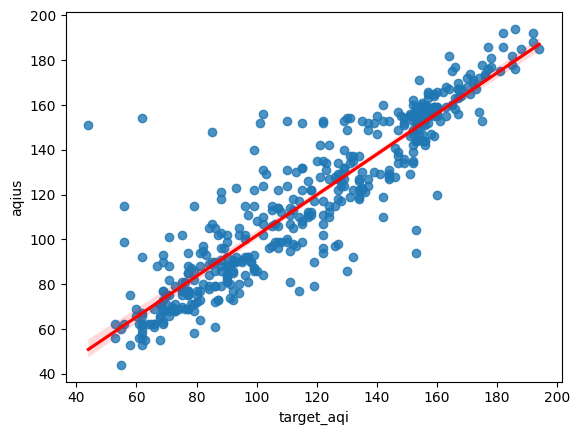

In [ ]:
sns.regplot(x='target_aqi',y='aqius',data=df,line_kws={"color":"red"})
plt.show()

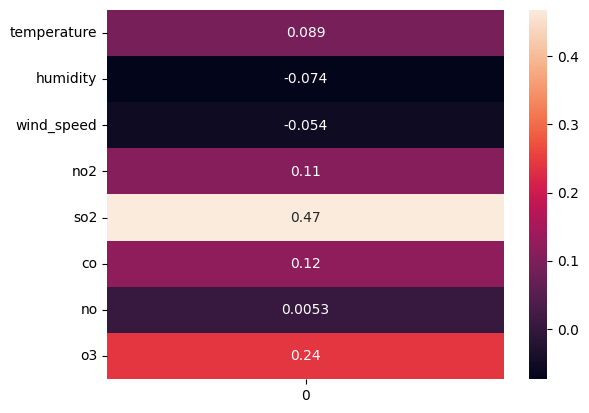

In [ ]:
import pandas as pd

x=['temperature', 'humidity','wind_speed','no2','so2' ,'co' ,'no','o3']
y=df[x].corrwith(df['aqius'])
sns.heatmap(y.to_frame(),annot=True)
plt.show()

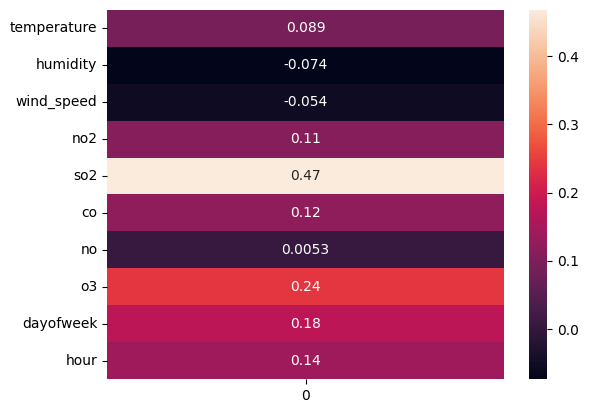

In [ ]:
import pandas as pd

x=['temperature', 'humidity','wind_speed','no2','so2' ,'co' ,'no','o3',"dayofweek","hour"]
y=df[x].corrwith(df['aqius'])
sns.heatmap(y.to_frame(),annot=True)
plt.show()

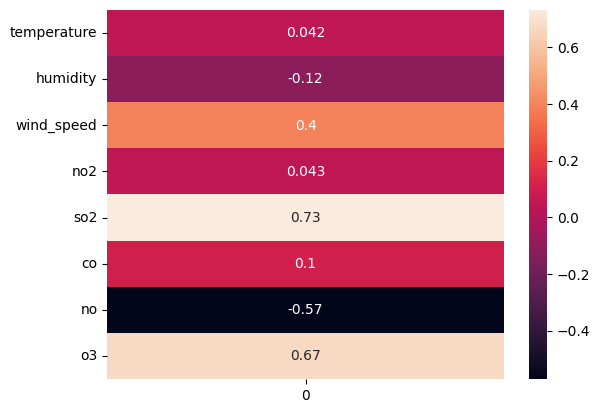

In [ ]:
import pandas as pd

x=['temperature', 'humidity','wind_speed','no2','so2' ,'co' ,'no','o3']
y=df[x].corrwith(df['pm10'])
sns.heatmap(y.to_frame(),annot=True)
plt.show()

Checking for imbalancement

---



---



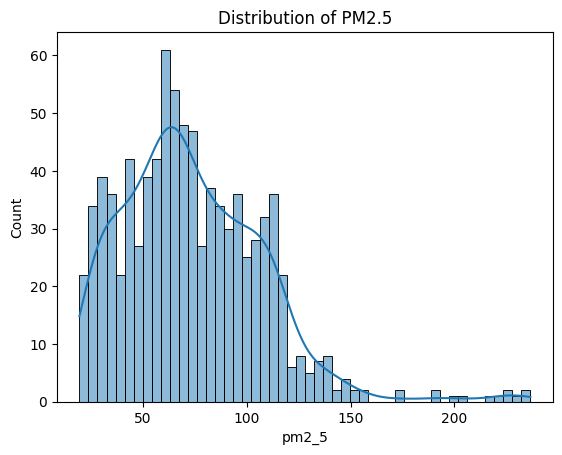

In [ ]:
sns.histplot(df["pm2_5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

In [ ]:
import numpy as np
df['pm2_5']=np.log1p(df['pm2_5'])

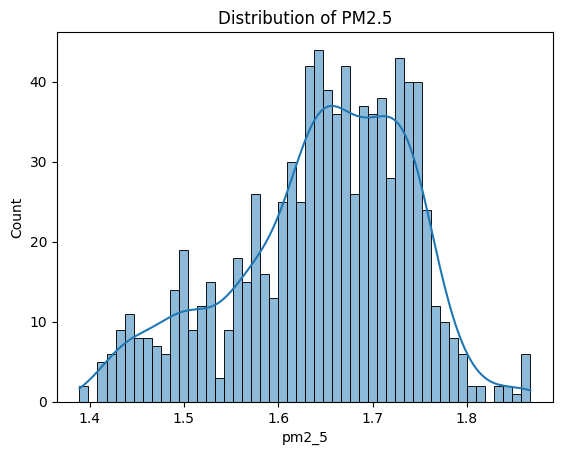

In [ ]:
import numpy as np
df['pm2_5']=np.log1p(df['pm2_5'])

sns.histplot(df["pm2_5"], bins=50, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

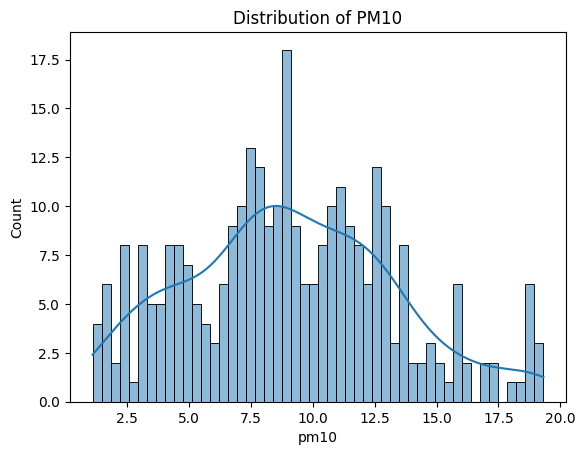

In [ ]:
sns.histplot(df["pm10"], bins=50,kde=True)
plt.title("Distribution of PM10")
plt.show()

In [ ]:
sns.histplot(df["aqius"], bins=50,kde=True)
plt.title("Distribution of aqius")
plt.show()

Machine Learning Model

---



---



In [ ]:
X=df[['so2', 'temperature', 'no', 'o3', 'humidity']]
y=df[['aqius']]

In [ ]:
print(df['aqius'].value_counts())


aqius
62     8
153    8
156    8
90     7
69     7
      ..
82     1
67     1
162    1
106    1
188    1
Name: count, Length: 111, dtype: int64


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Columns where outliers are observed (from your boxplot)
columns_to_check = ['so2', 'no', 'o3']
df = remove_outliers_iqr(df, columns_to_check)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train.squeeze())
ridge_preds = ridge_model.predict(X_test_scaled)

#RFG
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.squeeze())
rf_preds = rf_model.predict(X_test_scaled)

# #xgbregressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)


def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"rmse": rmse, "mae": mae, "r2": r2}


ridge_metrics=evaluate(y_test, ridge_preds)
rf_metrics=evaluate(y_test, rf_preds)
xgb_metrics=evaluate(y_test, xgb_preds)

#best model
models = {
     "Ridge": (ridge_model, ridge_metrics, True),
     "RandomForest": (rf_model, rf_metrics, False),
     "XGBRegressor": (xgb_model, xgb_metrics, False)
}

for name, val in models.items():
    print(f"{name}: {val}")

valid_models = {k: v for k,
                v in models.items()
                 if v is not None and v[1] is not None and 'r2' in v[1]}

# Now safely get the best model
best_model_name = max(valid_models, key=lambda k: valid_models[k][1]['r2'])
best_model, best_metrics, is_scaled = valid_models[best_model_name]

print(f"Best model: {best_model_name}")
print(f"Metrics: {best_metrics}")


Ridge: (Ridge(), {'rmse': 33.91351267137918, 'mae': 29.07290688942142, 'r2': 0.12717892387999807}, True)
RandomForest: (RandomForestRegressor(random_state=42), {'rmse': 23.963486413313923, 'mae': 18.934864864864867, 'r2': 0.5642075712867396}, False)
XGBRegressor: (XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state

In [ ]:
# print(xgb_preds)

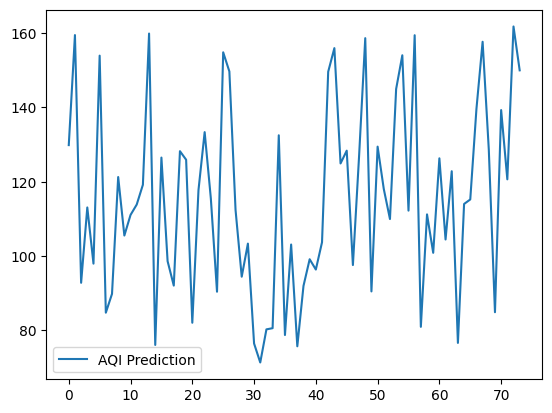

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(rf_preds,label='AQI Prediction')
plt.legend()
plt.show()

sns.histplot(rf_preds, kde=True)
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)
xgb_preds = xgb.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 20.61096897858827
MAE: 15.930801391601562
R2: 0.6776137948036194


In [ ]:
print(xgb_preds)

[142.17715  163.73433  101.294975 109.68235   91.523254 162.37738
  97.175865  96.78188  131.67772  118.15194  129.78009  133.95964
 123.95236  163.6312    72.80796  136.99333   97.09143   69.41037
 123.15248  134.57805   77.15308  148.57846  127.07503  119.31974
  99.395706 153.7735   153.17172  113.05225   71.96679  108.94339
  68.51874   72.20085   73.055214  76.37141  131.92564   77.189705
  98.482     70.22505   70.46796   87.66687   87.479416  84.21251
 155.96463  163.12036  127.55734  143.84138   99.22583  135.30104
 158.99292   89.48654  138.02374  129.50778  103.433525 138.25153
 150.02052  132.90448  159.75429   82.38479  104.47341   92.36906
 128.8654   103.40545  125.84145   88.54523  110.05698  104.801994
 140.02208  158.99292  129.85857   76.97853  150.7848   115.10402
 153.36151  146.01799 ]


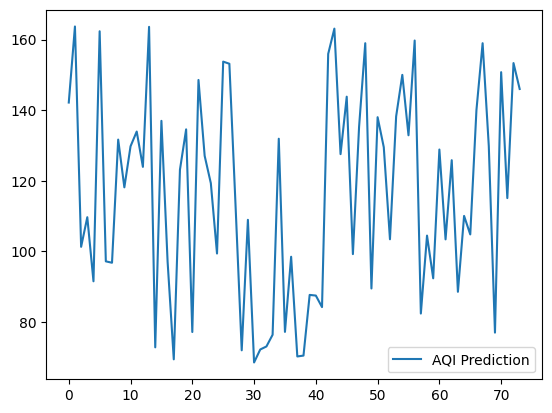

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(xgb_preds,label='AQI Prediction')
plt.legend()
plt.show()

In [ ]:
import os
import joblib
import pandas as pd

# ✅ Save predictions as a CSV inside model_dir
predictions = best_model.predict(X_test_scaled if is_scaled else X_test).flatten()
prediction_df = pd.DataFrame(
    np.column_stack((y_test.values, predictions)),
    columns=["y_true", "y_pred"]
)
model_dir = "best_model"
os.makedirs(model_dir, exist_ok=True)

# Save model
model_path = os.path.join(model_dir, "model.pkl")
joblib.dump(best_model, model_path)

# ✅ Save predictions to same folder
prediction_path = os.path.join(model_dir, "predictions.csv")
prediction_df.to_csv(prediction_path, index=False)

# Upload model directory with both model and predictions
mr = project.get_model_registry()
model = mr.python.create_model(
    name="AQI_prediction_model",
    metrics=best_metrics,
    description=f"Best model for predicting AQI: {best_model_name}"
)
model.save(os.path.abspath(model_dir))  # ✅ Save entire directory

print("✅ Model and predictions uploaded to registry.")


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /content/best_model/predictions.csv: 0.000%|          | 0/1609 elapsed<00:00 remaining<?

Uploading /content/best_model/model.pkl: 0.000%|          | 0/246240 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1238171/models/AQI_prediction_model/5
✅ Model and predictions uploaded to registry.


In [ ]:
! pip install shap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['so2', 'temperature', 'no', 'o3', 'humidity']])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train.squeeze())
predict=grid.predict(X_test)

print("Best Parameters:", grid.best_params_)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rmse = np.sqrt(mean_squared_error(y_test, predict))
mae = mean_absolute_error(y_test, predict)
r2 = r2_score(y_test, predict)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
RMSE: 22.491849626689877
MAE: 17.368
R2: 0.533237133465446


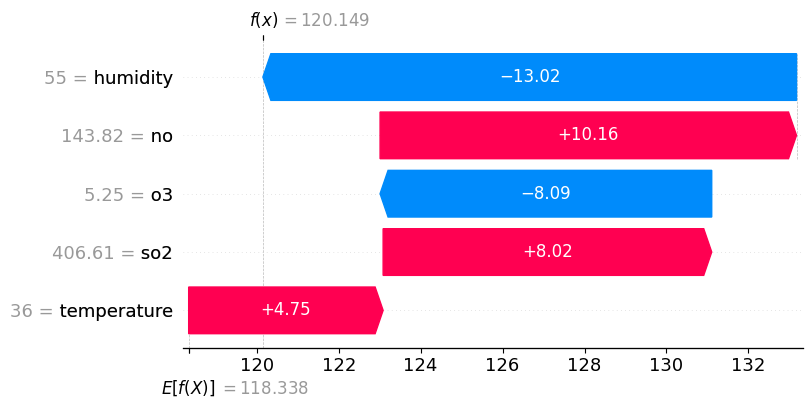

In [ ]:
import shap
ex=shap.Explainer(best_model)
shap_values=ex(X_test)
# shap.plots.bar(shap_values)
shap.plots.waterfall(shap_values[0])

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np

# ✅ Predict and save predictions
predictions = best_model.predict(X_test_scaled if is_scaled else X_test).flatten()
prediction_df = pd.DataFrame(
    np.column_stack((y_test.values, predictions)),
    columns=["y_true", "y_pred"]
)

# ✅ Save input features used for prediction (needed for SHAP)
feature_df = pd.DataFrame(X_test_scaled if is_scaled else X_test, columns=X.columns)

model_dir = "best_model"
os.makedirs(model_dir, exist_ok=True)

# ✅ Save model
model_path = os.path.join(model_dir, "model.pkl")
joblib.dump(best_model, model_path)

# ✅ Save predictions
prediction_path = os.path.join(model_dir, "predictions.csv")
prediction_df.to_csv(prediction_path, index=False)

# ✅ Save features for SHAP
features_path = os.path.join(model_dir, "features.csv")
feature_df.to_csv(features_path, index=False)

# ✅ Upload whole folder to Model Registry
mr = project.get_model_registry()
model = mr.python.create_model(
    name="AQI_prediction_model",
    metrics=best_metrics,
    description=f"Best model for predicting AQI: {best_model_name}"
)
model.save(os.path.abspath(model_dir))

print("✅ Model, predictions, and input features uploaded to registry.")


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /content/best_model/features.csv: 0.000%|          | 0/2130 elapsed<00:00 remaining<?

Uploading /content/best_model/predictions.csv: 0.000%|          | 0/1824 elapsed<00:00 remaining<?

Uploading /content/best_model/model.pkl: 0.000%|          | 0/265076 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1238171/models/AQI_prediction_model/9
✅ Model, predictions, and input features uploaded to registry.


In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import hopsworks
import os

project = hopsworks.login(
    project="Lahore_aqi",
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",
    # hostname="c.app.hopsworks.ai",
    # region_name="us-east-1",
    # cache=False
)

mr = project.get_model_registry()
model = mr.get_model("AQI_prediction_model", version=9)
model_dir = model.download()

# ✅ Load predictions
predictions_df = pd.read_csv(f"{model_dir}/predictions.csv")

# ✅ Only show last 3 predictions
last_3 = predictions_df.tail(3).copy()
last_3.index = pd.date_range(start=pd.Timestamp.today().normalize() + pd.Timedelta(days=1), periods=3)

# ✅ Title and table
st.title("🌍 Air Quality Forecast Dashboard")
st.subheader("📅 AQI Predictions for Next 3 Days")
st.dataframe(last_3[["y_pred"]].rename(columns={"y_pred": "Predicted AQI"}))

# ✅ Alert if AQI > 150
for date, row in last_3.iterrows():
    if row["y_pred"] > 150:
        st.error(f"⚠️ Unhealthy AQI on {date.date()}: {row['y_pred']:.2f}")
    else:
        st.success(f"✅ Good AQI on {date.date()}: {row['y_pred']:.2f}")

# ✅ SHAP Visualization
st.subheader("🔍 AQI Model Explanation with SHAP")

# Load model and example data
model_path = os.path.join(model_dir, "model.pkl")
model = joblib.load(model_path)
X = pd.read_csv(f"{model_dir}/features.csv")  # assuming you also saved this
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot SHAP summary
fig, ax = plt.subplots(figsize=(10, 4))
shap.plots.bar(shap_values, max_display=5, show=False)
st.pyplot(fig)


Connection closed.




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171


Downloading: 0.000%|          | 0/1824 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/265076 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/2130 elapsed<00:00 remaining<?

2025-07-21 15:39:41.834 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.840 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.843 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:41.870 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

2025-07-21 15:39:42.651 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:43.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:43.807 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-21 15:39:43.808 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Prophet Model- time series

only uses 2 features: timestamp and label(output variable)

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df_prophet = df.rename(columns={"timestamp": "ds", "aqius": "y"})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds']).dt.tz_localize(None)

train=df_prophet.iloc[:-72, :]
test=df_prophet.iloc[-72:]



In [ ]:
!pip install prophet


In [ ]:
from prophet import Prophet
pro=Prophet(daily_seasonality=True)

pro.fit(train)
future=pro.make_future_dataframe(periods=180,freq='H')
forecast=pro.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zo2satl/3com_3a8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8zo2satl/lfhszgvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5333', 'data', 'file=/tmp/tmp8zo2satl/3com_3a8.json', 'init=/tmp/tmp8zo2satl/lfhszgvw.json', 'output', 'file=/tmp/tmp8zo2satl/prophet_modelpa3xrbwl/prophet_model-20250725160653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:06:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:06:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning:

'H' is deprecated and will be removed in a future version

In [ ]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# mae = mean_absolute_error(test['y'], forecast['yhat'])
# mse = mean_squared_error(test['y'], forecast['yhat'])
# rmse = np.sqrt(mse)
# r2 = r2_score(test['y'], forecast['yhat'])

ValueError: Found input variables with inconsistent numbers of samples: [72, 401]

In [ ]:
from prophet.plot import plot_plotly
plot_plotly(pro, forecast)

In [ ]:
forecast[forecast.ds==pd.to_datetime('2025-7-31')]['yhat_upper']

Series([], Name: yhat_upper, dtype: float64)

Random Forest Regressor


In [ ]:
df["hour"]=df["timestamp"].dt.hour
df["dayofweek"]=df["timestamp"].dt.dayofweek

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd



# X=df[['so2', 'temperature', 'no', 'wind_speed','o3', 'humidity',"dayofweek","hour"]]
# y=df[['aqius']]

df['aqius_lag1'] = df['aqius'].shift(1)
df['aqius_lag2'] = df['aqius'].shift(2)
df['aqius_avg3'] = df['aqius'].rolling(window=3).mean()


train=df.iloc[:-72, :]
test=df.iloc[-72:]

X_train=train[['so2', 'temperature', 'o3', "dayofweek","hour",'aqius_lag1', 'aqius_lag2', 'aqius_avg3']]
y_train=train[['aqius']]
X_test=test[['so2', 'temperature',  'o3', "dayofweek","hour",'aqius_lag1', 'aqius_lag2', 'aqius_avg3']]
y_test=test[['aqius']]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.squeeze())
rf_preds = rf_model.predict(X_test_scaled)


In [ ]:
mae=mean_absolute_error(y_test, rf_preds)
mse=mean_squared_error(y_test, rf_preds)
r2=r2_score(y_test, rf_preds)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 13.550833333333335
MSE: 284.07744722222225
R2: 0.7673707689070612


In [ ]:
print(rf_preds)

[106.32  95.97 146.66  79.03 118.5  116.56 103.71  80.19  77.53  76.62
  83.82  74.02 109.2  133.21 142.83  95.01  85.85 113.11  88.49 133.89
  90.57  87.62 116.77  82.69  80.85 118.64 134.73 149.82  95.58 105.
 103.72 136.2  132.62 165.34 154.01  87.92  98.97 123.73 103.47  92.7
  76.68  72.84 132.17 145.28 137.97 163.55 139.08 137.03 162.12 159.08
 139.92  87.98  84.69  82.19  74.33  73.5   77.58  65.03  73.94  73.84
  91.4   99.04 113.95 121.12 134.55 129.12 131.47 141.69 124.16 150.42
 101.12 146.77]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import hopsworks
import joblib
import os

project = hopsworks.login(
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",  # Replace with your real API key or use environment variable
    project="Lahore_aqi"
)
fs = project.get_feature_store()

fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df= fg.select_all().read()
# print(df.columns)
# print(df.head())


df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)


df["hour"]=df["timestamp"].dt.hour
df["dayofweek"]=df["timestamp"].dt.dayofweek


df['aqius_lag1'] = df['aqius'].shift(1)
df['aqius_lag2'] = df['aqius'].shift(2)
df['aqius_avg3'] = df['aqius'].rolling(window=3).mean()
df = df.dropna()  # important for lags/rolling

# X=df[['so2', 'temperature', 'no', 'o3', 'humidity',"dayofweek"]]
# y=df[['aqius']]

train=df.iloc[:-72, :]
test=df.iloc[-72:]

X_train=train[['so2', 'temperature', 'no', 'o3',"dayofweek","hour",'aqius_lag1', 'aqius_lag2', 'aqius_avg3']]
y_train=train[['aqius']]
X_test=test[['so2', 'temperature','no', 'o3', "dayofweek","hour",'aqius_lag1', 'aqius_lag2', 'aqius_avg3']]
y_test=test[['aqius']]

# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

#  Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.squeeze())
rf_preds = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, rf_preds)
mae = mean_absolute_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)
rmse=np.sqrt(mse)

 # Save predictions & features
prediction_df = pd.DataFrame({
    'actual': y_test.squeeze(),
    'predicted': rf_preds
})

prediction_df.to_csv("prediction.csv", index=False)
X_test.to_csv("features.csv", index=False)

model_dir = "AQI_prediction_model"
os.makedirs(model_dir, exist_ok=True)

#  Save model
model_path = os.path.join(model_dir, "model.pkl")
joblib.dump(rf_model,model_path)

# Save predictions as CSV
prediction_path = os.path.join(model_dir, "predictions.csv")
prediction_df.to_csv(prediction_path, index=False)

#  Save input features for SHAP or review
features_path = os.path.join(model_dir, "features.csv")
X_test.to_csv(features_path, index=False)


#  Upload full folder to Model Registry
mr = project.get_model_registry()
model = mr.python.create_model(
    name="AQI_prediction_model",
    metrics={"mae":mae,"mse":mse,"rmse":rmse,"r2":r2},
    description=f"Best model for predicting AQI: Random Forest Regression"
)
model.save(os.path.abspath(model_dir))

print(" Model, predictions, features, and metrics uploaded to registry.")


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.88s) 


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /content/AQI_prediction_model/predictions.csv: 0.000%|          | 0/729 elapsed<00:00 remaining<?

Uploading /content/AQI_prediction_model/features.csv: 0.000%|          | 0/4667 elapsed<00:00 remaining<?

Uploading /content/AQI_prediction_model/model.pkl: 0.000%|          | 0/3082465 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1238171/models/AQI_prediction_model/27
 Model, predictions, features, and metrics uploaded to registry.


In [ ]:
print(rf_preds)

[ 77.91 125.37 110.73 107.69  88.45 132.23 149.67  88.4   99.77  88.57
  84.39 101.53  94.87 138.68  83.23 120.57 114.55  99.23  80.21  78.53
  77.    86.55  76.92 114.05 135.54 145.56  93.61  78.88 119.29  85.12
 132.14  87.31  86.36 121.37  80.49  76.65 123.54 141.13 156.49  96.65
 105.53  95.8  138.17 128.76 164.58 160.25  93.79  97.69 123.21 112.26
  96.53  81.59  78.33 128.47 143.   131.67 162.52 141.98 135.4  162.4
 160.44 147.17  88.5   85.88  83.93  79.03  78.78  79.62  74.83  80.48
  82.46  88.61]


In [ ]:
!pip install hopsworks==4.2

In [ ]:
import hsfs
import hopsworks
import pandas as pd

project = hopsworks.login()
mr = project.get_model_registry()

# Get model from registry
model = mr.get_model("AQI_prediction_model", version=20)
model_dir = model.download()

print("Model type:", type(model_dir))


# Load features.csv and predictions.csv from model_dir
features_df = pd.read_csv(model_dir + "/features.csv")
predictions_df = pd.read_csv(model_dir + "/predictions.csv")

# (Optional) Print to verify
print("Top 5 feature importances:")
print(features_df.head())

print("\nTop 5 predictions:")
print(predictions_df.tail())

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171


Downloading: 0.000%|          | 0/889 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/35 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/5223 elapsed<00:00 remaining<?

Model type: <class 'str'>
Top 5 feature importances:
      so2  temperature      no     o3  humidity  dayofweek  hour  aqius_lag1  \
0  539.09         31.0   17.35  11.40      73.0          2    21       175.0   
1  371.27         25.0   36.30  16.09      60.0          1    15       115.0   
2  568.60         34.0  108.22  11.11      48.0          6     4       166.0   
3  266.66         31.0   43.65  12.59      73.0          2    20       102.0   
4  264.71         36.0   83.37  12.15      51.0          6    12        87.0   

   aqius_lag2  aqius_avg3  
0        79.0  139.666667  
1        75.0   92.666667  
2       174.0  175.000000  
3       168.0  118.666667  
4       115.0   90.000000  

Top 5 predictions:
    actual  predicted
81      81      81.38
82      90      87.63
83     111     114.21
84      69      61.59
85      62      69.15


Downloading: 0.000%|          | 0/914 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/3000241 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/2712 elapsed<00:00 remaining<?

https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


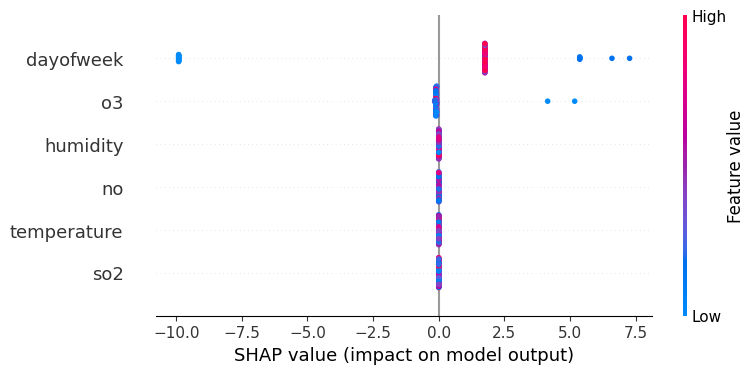

In [ ]:
mr = project.get_model_registry()
model = mr.get_model("AQI_prediction_model", version=24)
model_dir = model.download()

# Step 2: Load the actual model.pkl file
import joblib
model_path = os.path.join(model_dir, "model.pkl")
real_model = joblib.load(model_path)

# Step 3: Load the features and predictions for SHAP
import pandas as pd
features_path = os.path.join(model_dir, "features.csv")
predictions_path = os.path.join(model_dir, "predictions.csv")

X_test = pd.read_csv(features_path)
y_pred = pd.read_csv(predictions_path)

# Step 4: SHAP visualization
import shap
explainer = shap.Explainer(real_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
import gradio as gr
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import hopsworks
import os

#  Hopsworks login
project = hopsworks.login(
    api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC",
    project="Lahore_aqi"
)

mr = project.get_model_registry()
model = mr.get_model("AQI_prediction_model", version=26)
model_dir = model.download()

# Step 2: Load the actual model.pkl file
import joblib
model_path = os.path.join(model_dir, "model.pkl")
real_model = joblib.load(model_path)

# Step 3: Load the features and predictions for SHAP
import pandas as pd
features_path = os.path.join(model_dir, "features.csv")
predictions_path = os.path.join(model_dir, "predictions.csv")

X_test = pd.read_csv(features_path)
y_pred = pd.read_csv(predictions_path)

# Step 4: SHAP visualization
import shap
explainer = shap.Explainer(real_model, X_test)
shap_values = explainer(X_test)


# ✅ Define dashboard function
def aqi_dashboard():
    # Get last 3 predictions
    last_3 = y_pred.tail(3).copy()
    last_3.index = pd.date_range(start=pd.Timestamp.today().normalize() + pd.Timedelta(days=1), periods=3)

    # Alerts
    alerts = []
    for date, row in last_3.iterrows():
        val = row["predicted"]
        if val > 150:
            alerts.append(f"⚠️ Unhealthy AQI on {date.date()}: {val:.2f}")
        else:
            alerts.append(f"✅ Good AQI on {date.date()}: {val:.2f}")

    # AQI forecast table
    table_html = last_3[["predicted"]].rename(columns={"predicted": "Predicted AQI"}).to_html()

    # SHAP bar plot
    fig, ax = plt.subplots(figsize=(10, 4))
    shap.plots.bar(shap_values, show=False)
    plot_path = "shap_summary.png"
    plt.savefig(plot_path, bbox_inches="tight")
    plt.close()

    return table_html, "\n".join(alerts), plot_path

#  Gradio interface
demo = gr.Interface(
    fn=aqi_dashboard,
    inputs=[],
    outputs=[
        gr.HTML(label="📊 AQI Forecast Table"),
        gr.Textbox(label="📢 Alerts"),
        gr.Image(label="🔍 SHAP Feature Importance")
    ],
    title="🌍 AQI Forecast Dashboard",
    description="3-day AQI prediction for Lahore with SHAP model explanation."
)

demo.launch()

Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171


Downloading: 0.000%|          | 0/763 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/613137 elapsed<00:00 remaining<?

Downloading: 0.000%|          | 0/4691 elapsed<00:00 remaining<?

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://66cd893d87b383c35a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.53s) 


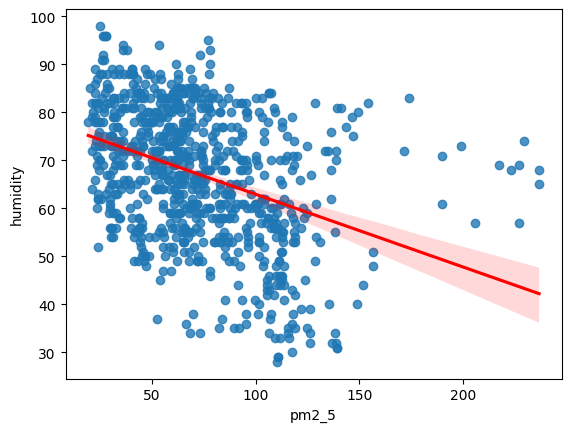

In [ ]:
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='pm2_5',y='humidity',data=df,line_kws={"color":"red"})
plt.show()

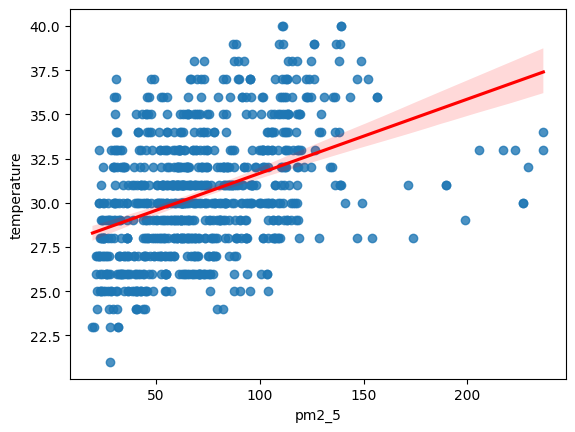

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='pm2_5',y='temperature',data=df,line_kws={"color":"red"})
plt.show()

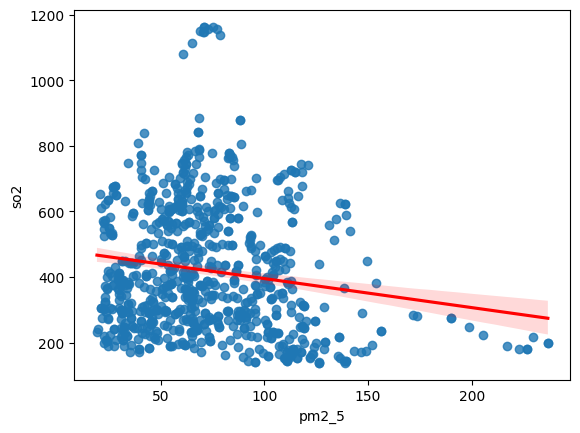

In [ ]:
sns.regplot(x='pm2_5',y='so2',data=df,line_kws={"color":"red"})
plt.show()

In [ ]:
sns.regplot(x='pm2_5',y='wind_speed',data=df,line_kws={"color":"red"})
plt.show()

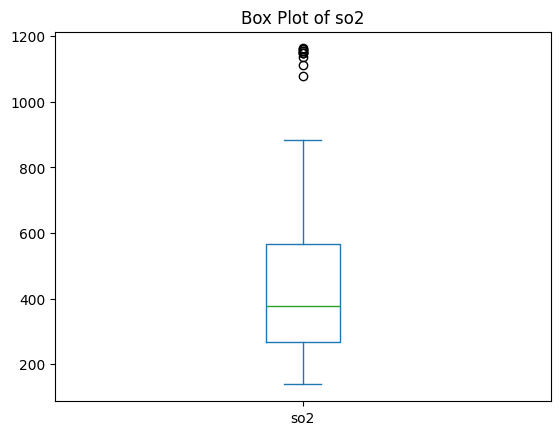

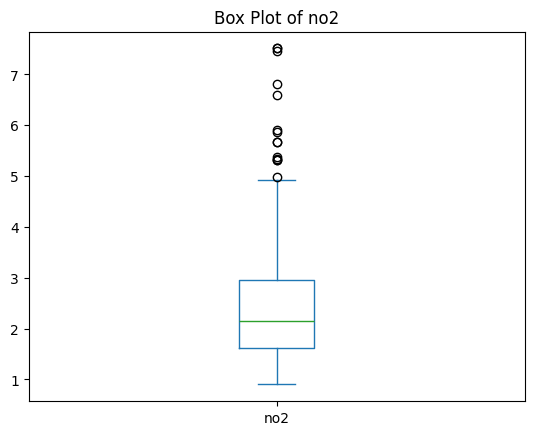

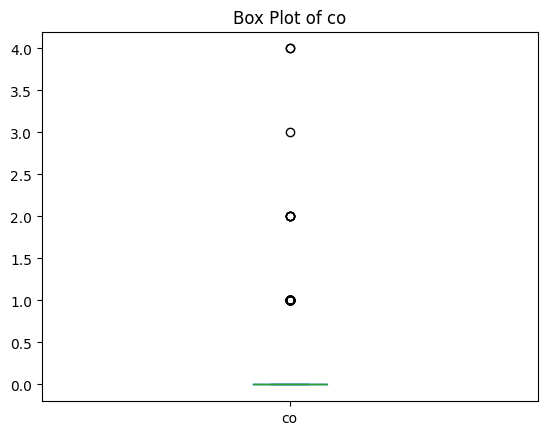

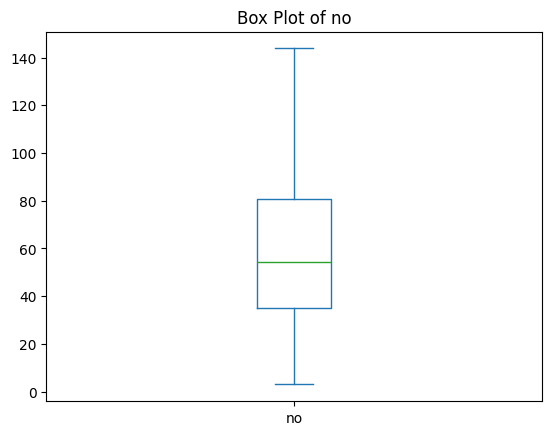

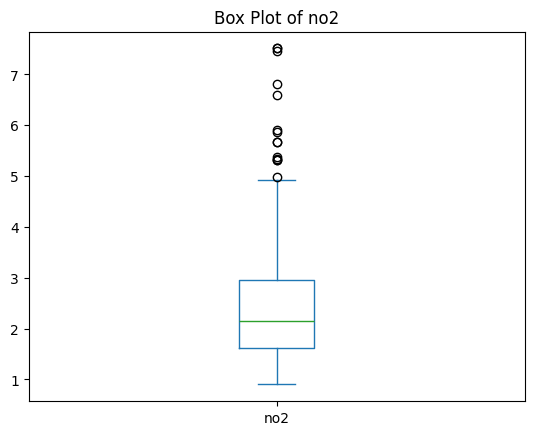

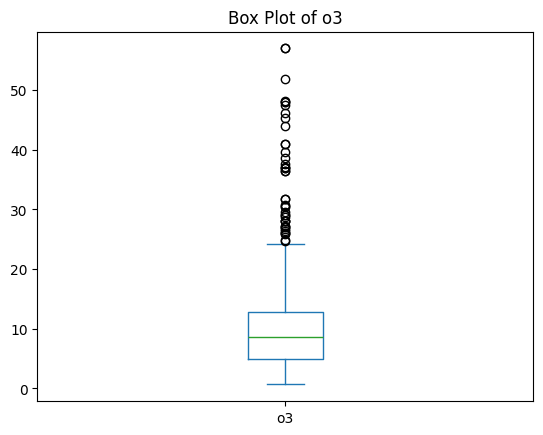

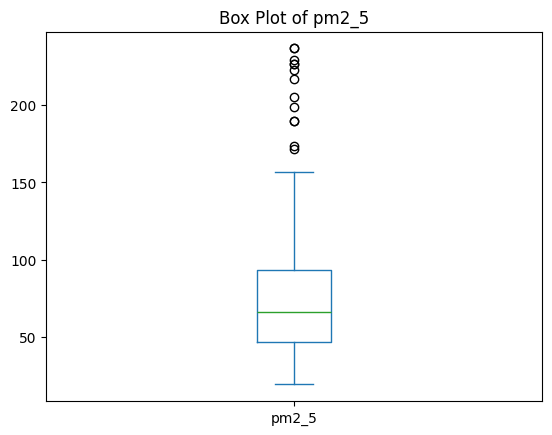

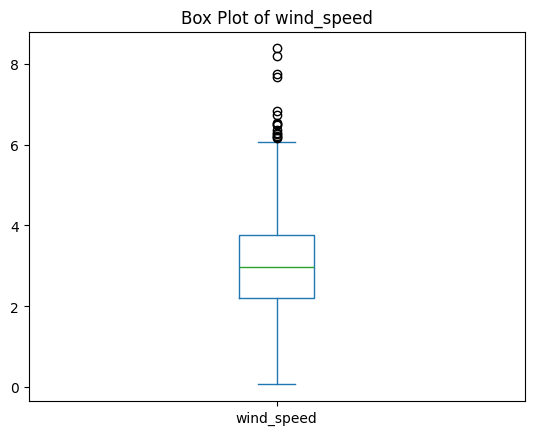

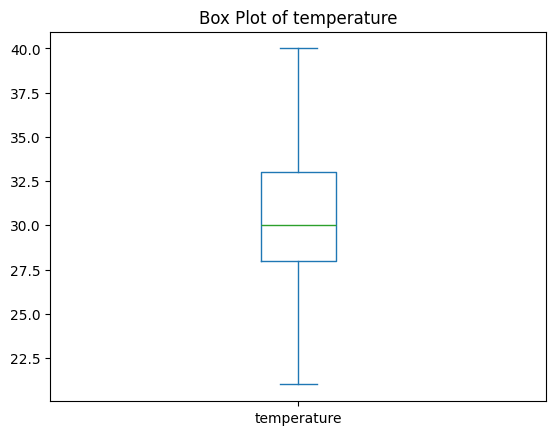

In [ ]:
df['so2'].plot(kind='box', title='Box Plot of so2')
plt.show()
df['no2'].plot(kind='box', title='Box Plot of no2')
plt.show()
df['co'].plot(kind='box', title='Box Plot of co')
plt.show()
df['no'].plot(kind='box', title='Box Plot of no')
plt.show()
df['no2'].plot(kind='box', title='Box Plot of no2')
plt.show()
df['o3'].plot(kind='box', title='Box Plot of o3')
plt.show()
df['pm2_5'].plot(kind='box', title='Box Plot of pm2_5')
plt.show()
df['pm10'].plot(kind='box', title='Box Plot of pm10')
plt.show()
df['humidity'].plot(kind='box', title='Box Plot of humidity')
plt.show()
df['wind_speed'].plot(kind='box', title='Box Plot of wind_speed')
plt.show()
df['temperature'].plot(kind='box', title='Box Plot of temperature')
plt.show()

In [ ]:
Q1 = df['so2'].quantile(0.25)
Q3 = df['so2'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1,Q3,IQR)
print(lower_bound,upper_bound)

# outliers = df[(df['so2'] < lower_bound) | (df['so2'] > upper_bound)]
# print("Outliers:\n", outliers)

266.49 565.94 299.45000000000005
-182.68500000000006 1015.1150000000001


In [ ]:
q1=df['pm2_5'].quantile(0.25)
q3=df['pm2_5'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print(q1,q3,iqr)
print(lower_bound,upper_bound)

47.269999999999996 93.21 45.94
-21.64 162.12


In [ ]:
df_clean = df[(df['pm2_5'] >= lower_bound) & (df['pm2_5'] <= upper_bound)]
print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")

Original shape: (819, 26), Cleaned shape: (806, 26)


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','no2','co' ,'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7','pm2_5_std7','pm2_5_avg14','pm2_5_std14','pm2_5_max','month','dayofweek']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =RandomForestRegressor(n_estimators=600,max_depth=3,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
train = xgb_model.predict(X_train_scaled)
test = xgb_model.predict(X_test_scaled)

train_r2=r2_score(y_train,train)
test_r2=r2_score(y_test,test)

rmse_train=np.sqrt(mean_squared_error(y_train,train))
rmse_test=np.sqrt(mean_squared_error(y_test,test))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

accuracy_train=rmse_train/y_train.mean()*100
accuracy_test=rmse_test/y_test.mean()*100
print("accuracy_train:",100-accuracy_train)
print("accuracy_test:",100-accuracy_test)

mape_train = np.mean(np.abs((y_train - train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test) / y_test)) * 100

print("MAPE Train: {:.2f}%".format(mape_train))
print("MAPE Test: {:.2f}%".format(mape_test))



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.48s) 
train_r2: 0.9689682484312793
test_r2: 0.7908152754393117
rmse_train: 6.04862627078679
rmse_test: 4.194308833005843
accuracy_train: 91.2130903818478
accuracy_test: 96.17077578563233
MAPE Train: 7.71%
MAPE Test: 2.69%


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','no2', 'co', 'no', 'o3','humidity','pm2_5_lag1','pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =Ridge(alpha=0.1)
xgb_model.fit(X_train_scaled, y_train)
train = xgb_model.predict(X_train_scaled)
test = xgb_model.predict(X_test_scaled)

train_r2=r2_score(y_train,train)
test_r2=r2_score(y_test,test)

rmse_train=np.sqrt(mean_squared_error(y_train,train))
rmse_test=np.sqrt(mean_squared_error(y_test,test))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

accuracy_train=rmse_train/y_train.mean()*100
accuracy_test=rmse_test/y_test.mean()*100
print("accuracy_train:",100-accuracy_train)
print("accuracy_test:",100-accuracy_test)

mape_train = np.mean(np.abs((y_train - train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test) / y_test)) * 100

print("MAPE Train: {:.2f}%".format(mape_train))
print("MAPE Test: {:.2f}%".format(mape_test))



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.51s) 
train_r2: 0.9999386025612744
test_r2: 0.9995286400449166
rmse_train: 0.2690473592239154
rmse_test: 0.19910023064919363
accuracy_train: 99.60915177716947
accuracy_test: 99.81823002200301
MAPE Train: 0.27%
MAPE Test: 0.11%


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
# df['pm2_5_lag24'] = df['pm2_5'].shift(24)
# df['pm2_5_lag48'] = df['pm2_5'].shift(48)

df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()

df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
# df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
# df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
# df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek


# 'pm2_5_avg7','pm2_5_std7','pm2_5_avg14',
# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','so2','no2','co' ,'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7','pm2_5_avg14','month','dayofweek']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =XGBRegressor(n_estimators=100,max_depth=2,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
train = xgb_model.predict(X_train_scaled)
test = xgb_model.predict(X_test_scaled)

train_r2=r2_score(y_train,train)
test_r2=r2_score(y_test,test)

rmse_train=np.sqrt(mean_squared_error(y_train,train))
rmse_test=np.sqrt(mean_squared_error(y_test,test))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

accuracy_train=rmse_train/y_train.mean()*100
accuracy_test=rmse_test/y_test.mean()*100
print("accuracy_train:",100-accuracy_train)
print("accuracy_test:",100-accuracy_test)

mape_train = np.mean(np.abs((y_train - train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test) / y_test)) * 100

print("MAPE Train: {:.2f}%".format(mape_train))
print("MAPE Test: {:.2f}%".format(mape_test))



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.53s) 
train_r2: 0.978041842807276
test_r2: 0.8690785974274973
rmse_train: 5.111035551139663
rmse_test: 4.271144179666332
accuracy_train: 92.66287907009769
accuracy_test: 95.96548568821213
MAPE Train: 5.96%
MAPE Test: 3.00%


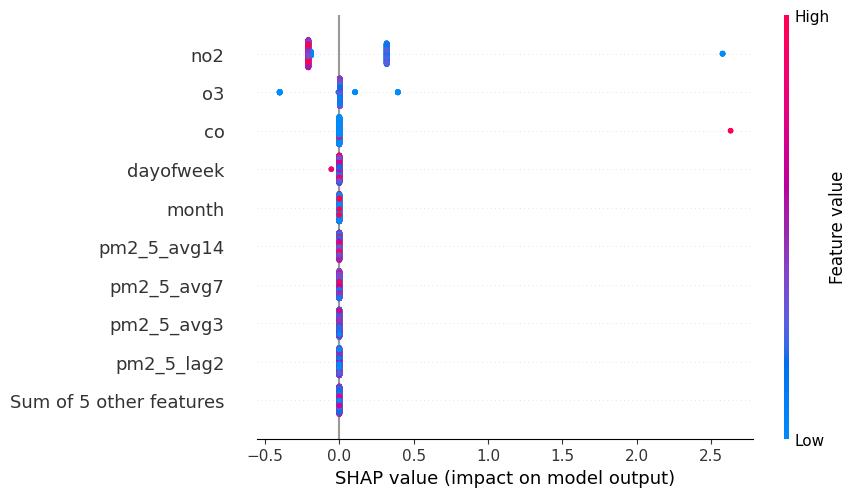

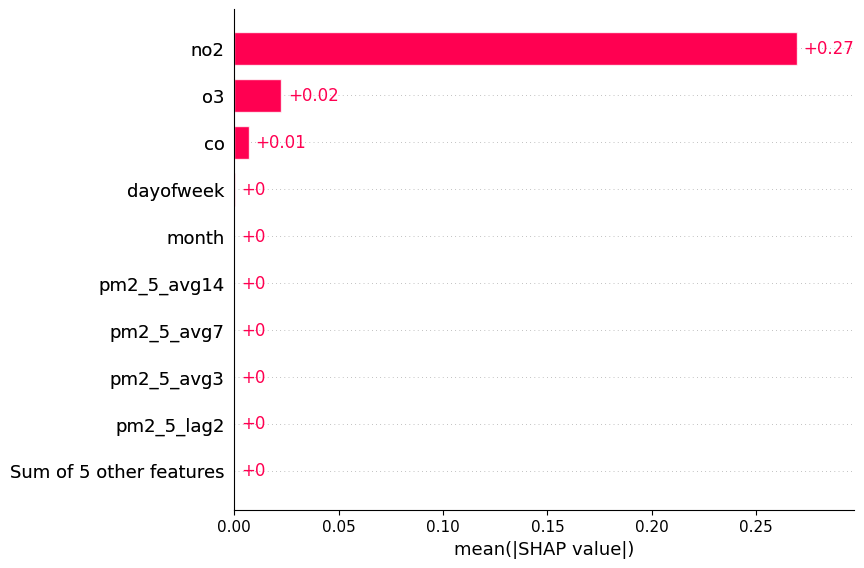

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

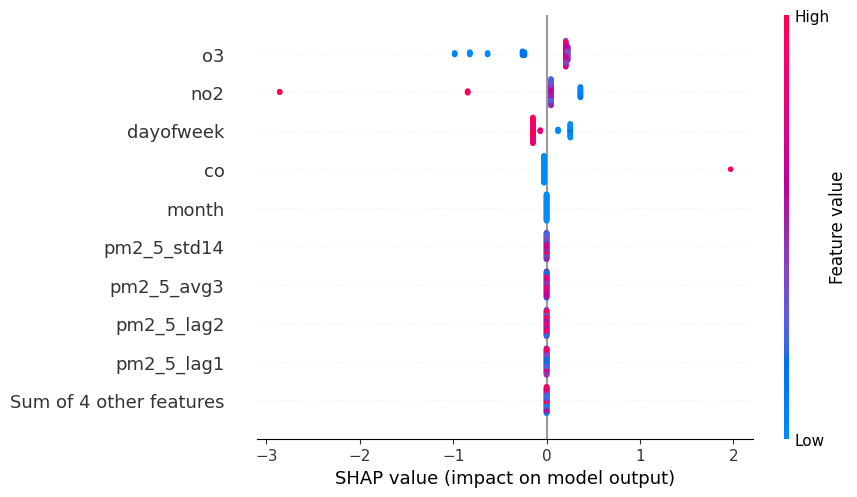

In [ ]:
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

plt.figure(figsize=(10, 8))
shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
from lightgbm import LGBMRegressor
# from sklearn.model_selection import TimeSeriesSplit
# # import xgboost as xgb
# from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_lag24'] = df['pm2_5'].shift(24)
df['pm2_5_lag48'] = df['pm2_5'].shift(48)

df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()

# df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
# df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
# df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
# df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
# df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()
# 'pm2_5_avg7','pm2_5_std7','pm2_5_avg14','pm2_5_std14','pm2_5_max',


df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','no2','co' ,'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_lag24','pm2_5_lag48','month','dayofweek']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =LGBMRegressor( max_depth=2,learning_rate=0.01,n_estimators=500,reg_alpha=1.0,reg_lambda=1.0)
xgb_model.fit(X_train_scaled, y_train)
train = xgb_model.predict(X_train_scaled)
test = xgb_model.predict(X_test_scaled)

train_r2=r2_score(y_train,train)
test_r2=r2_score(y_test,test)

rmse_train=np.sqrt(mean_squared_error(y_train,train))
rmse_test=np.sqrt(mean_squared_error(y_test,test))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

accuracy_train=rmse_train/y_train.mean()*100
accuracy_test=rmse_test/y_test.mean()*100
print("accuracy_train:",100-accuracy_train)
print("accuracy_test:",100-accuracy_test)

mape_train = np.mean(np.abs((y_train - train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test) / y_test)) * 100

print("MAPE Train: {:.2f}%".format(mape_train))
print("MAPE Test: {:.2f}%".format(mape_test))



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.52s) 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 13
[LightGBM] [Info] Start training from score 68.980407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use same model params as your current "best" run
xgb_model = XGBRegressor(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.1,
    reg_alpha=0.2,
    reg_lambda=5.0,
    subsample=0.6,
    colsample_bytree=0.6,
    random_state=42
)

tscv = TimeSeriesSplit(n_splits=4)
r2_scores = []
rmse_scores = []

for train_index, test_index in tscv.split(X_train_scaled):
    X_tr, X_val = X_train_scaled[train_index], X_train_scaled[test_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

    xgb_model.fit(X_tr, y_tr)
    preds = xgb_model.predict(X_val)

    r2_scores.append(r2_score(y_val, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val, preds)))

print("Time Series CV Results:")
print("Average R²:", np.mean(r2_scores))
print("R² scores per split:", r2_scores)
print("Average RMSE:", np.mean(rmse_scores))
print("RMSE per split:", rmse_scores)


Time Series CV Results:
Average R²: 0.6777550880279791
R² scores per split: [0.8297957972612431, 0.873077109581281, 0.2740936430781865, 0.7340538021912059]
Average RMSE: 16.09872579404734
RMSE per split: [9.02738499723648, 5.355240206880715, 37.89246005349375, 12.119817918578418]



Fold 1 date range: 2025-07-11 18:30:20.122088+00:00 → 2025-07-18 09:26:51.974782+00:00
PM2.5 mean: 57.525958904109594 std: 22.381796654602034 min: 21.03 max: 131.07
R²: 0.8134433265383207 RMSE: 9.63402820673561



Fold 2 date range: 2025-07-18 10:24:25.778654+00:00 → 2025-07-25 01:51:09.045273+00:00
PM2.5 mean: 53.434383561643834 std: 14.73849971181986 min: 21.57 max: 87.71
R²: 0.8723279028718308 RMSE: 5.248181506664413


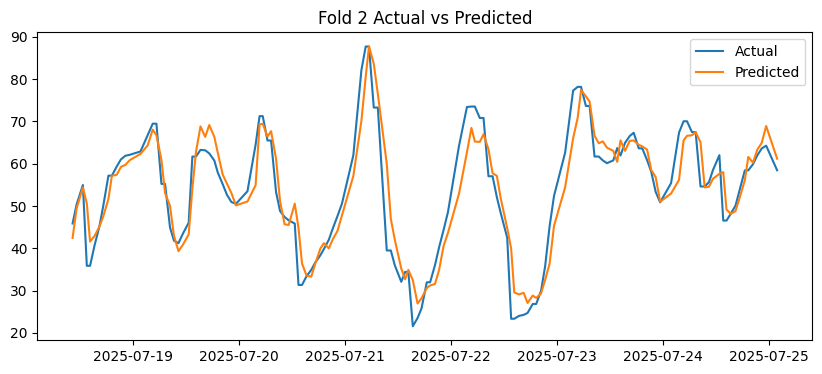


Fold 3 date range: 2025-07-25 03:39:43.004463+00:00 → 2025-07-31 17:22:27.030440+00:00
PM2.5 mean: 91.27657534246576 std: 43.96170392101644 min: 45.86 max: 236.68
R²: 0.26211337916924027 RMSE: 37.63369909800094


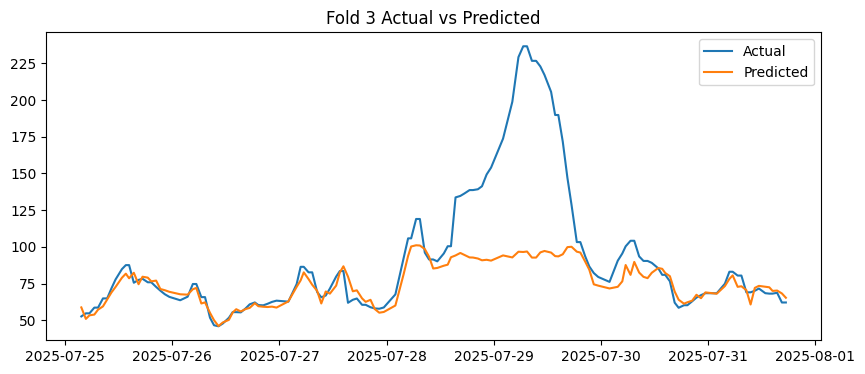


Fold 4 date range: 2025-07-31 18:33:52.313822+00:00 → 2025-08-07 12:48:58.354624+00:00
PM2.5 mean: 94.07952054794518 std: 27.590848316117853 min: 38.22 max: 156.48
R²: 0.8178918649730567 RMSE: 11.733762681305219


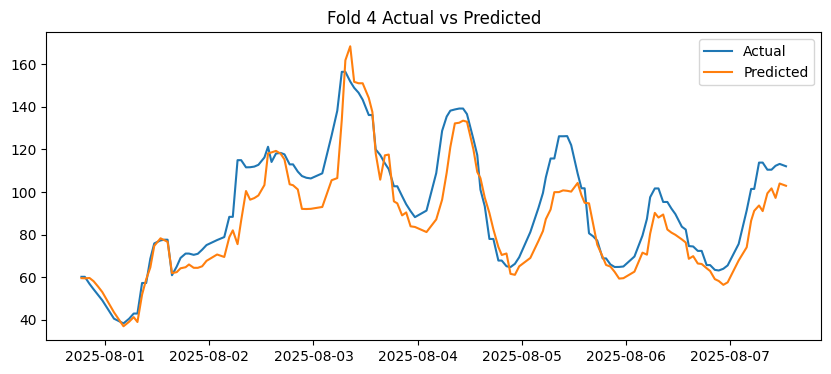

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming X_train, y_train, and df are already defined
tscv = TimeSeriesSplit(n_splits=4)
fold = 1

for train_index, test_index in tscv.split(X_train):
    X_tr, X_te = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tr, y_te = y_train.iloc[train_index], y_train.iloc[test_index]

    # Get date range for this fold
    fold_dates = df.iloc[test_index]['timestamp']
    print(f"\nFold {fold} date range: {fold_dates.min()} → {fold_dates.max()}")

    # Stats on target
    print("PM2.5 mean:", y_te.mean(), "std:", y_te.std(), "min:", y_te.min(), "max:", y_te.max())

    # Train and predict
    model = xgb_model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    r2 = r2_score(y_te, preds)
    rmse = np.sqrt(mean_squared_error(y_te, preds))
    print("R²:", r2, "RMSE:", rmse)

    # Plot actual vs predicted for visual inspection
    plt.figure(figsize=(10,4))
    plt.plot(fold_dates, y_te.values, label='Actual')
    plt.plot(fold_dates, preds, label='Predicted')
    plt.title(f'Fold {fold} Actual vs Predicted')
    plt.legend()
    plt.show()

    fold += 1


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','no2','co' ,'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_std14','month','dayofweek']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =XGBRegressor(n_estimators=200,max_depth=4,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluate Final Test Set
mse = mean_squared_error(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_test - xgb_preds) / y_test)) * 100

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)
print("MAPE Test: {:.2f}%".format(mape_test))

# #US EPA Formula: AQI
# BP_high=None
# BP_low=None
# AQI_high=None
# AQI_low=None
# aqi=[]

# for i in xgb_preds:
#   if i>=0.0 and i<= 9.0:
#       BP_low=0.0
#       BP_high=9.0
#       AQI_low=0
#       AQI_high=50
#   elif i>=9.1 and i<=35.4:
#       BP_low=9.1
#       BP_high=35.4
#       AQI_low=51
#       AQI_high=100
#   elif i>=35.5 and i<=55.4:
#       BP_low=35
#       BP_high=55.4
#       AQI_low=101
#       AQI_high=150
#   elif i>=55.5 and i<=125.4:
#       BP_low=55.5
#       BP_high=125.4
#       AQI_low=151
#       AQI_high=200
#   elif i>=125.5 and i<=225.4:
#       BP_low=125.5
#       BP_high=225.4
#       AQI_low=152
#       AQI_high=300
#   elif i>=225.5 and i<=325.4:
#       BP_low=225.5
#       BP_high=325.4
#       AQI_low=301
#       AQI_high=500
#   AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
#   aqi.append(AQI)

# # Save predictions, calculations & features
# prediction_df = pd.DataFrame({"actual":y_test.values,'predicted_pm2_5':xgb_preds,"calculated_aqi":aqi})
# prediction_df.to_csv("prediction.csv", index=False)
# X_test.to_csv("features.csv", index=False)

# model_dir = "AQI_prediction_model"
# os.makedirs(model_dir, exist_ok=True)

# # Saving model
# model_path = os.path.join(model_dir, "model.pkl")
# joblib.dump(xgb_model, model_path)

# # Save predictions and test features
# prediction_df.to_csv(os.path.join(model_dir, "predictions.csv"), index=False)
# X_test.to_csv(os.path.join(model_dir, "features.csv"), index=False)

# # Upload to Hopsworks Model Registry
# mr = project.get_model_registry()
# model = mr.python.create_model(
#     name="AQI_prediction_model",
#     metrics={"mae": mae, "mse": mse, "rmse": rmse, "r2": r2,"mape":mape},
#     description="PM2.5 predictions and Calculated AQI"
# )
# model.save(os.path.abspath(model_dir))

# print("Model, predictions, features, and metrics uploaded to registry.")



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.44s) 
MSE : 19.68352215206305
MAE : 3.42873277452257
RMSE: 4.4366115619989825
R2  : 0.8587381145446339
MAPE Test: 2.95%


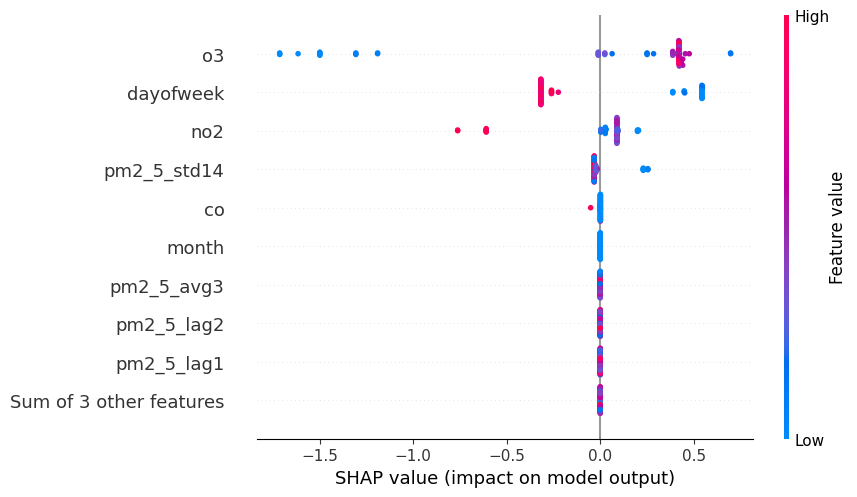

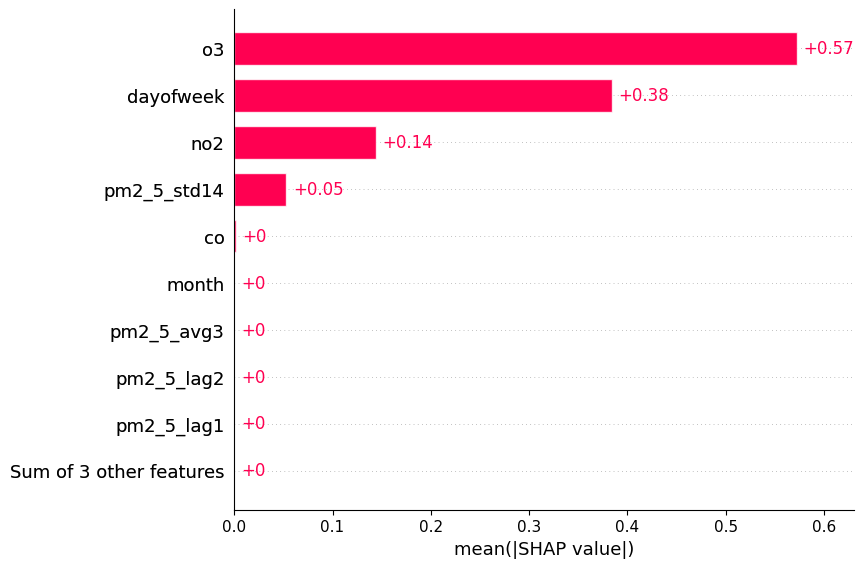

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

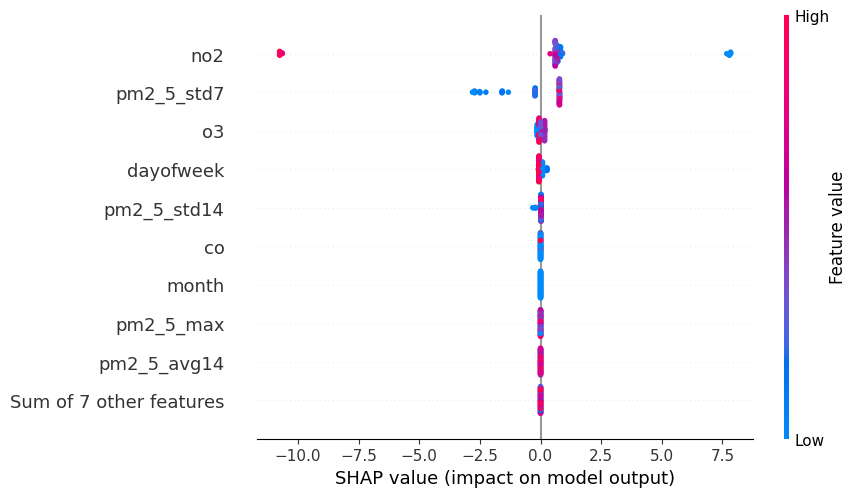

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
print("MAPE Test: {:.2f}%".format(mape_test))

MAPE Test: 2.69%


In [ ]:
import matplotlib.pyplot as plt

plt.plot(xgb_preds,label="Predicted aqi",marker="o",color="orange")
plt.legend()
plt.show()

In [ ]:
mean_actual = y_test.mean()
print(mean_actual)
rmse_percent = (rmse / mean_actual) * 100

accuracy_r2 = r2 * 100

print("RMSE (% of mean):",rmse_percent)
print("prediction accuracy:",100-rmse_percent)
print("R2 accuracy:",accuracy_r2)

107.11430555555556
RMSE (% of mean): 3.411791454362715
prediction accuracy: 96.58820854563729
R2 accuracy: 87.99244430962827


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values,label="Actual pm2.5",color="blue")
plt.plot(xgb_preds,label="Predicted pm2.5",color="orange")
plt.legend()
plt.xlabel('Actual pm2.5')
plt.ylabel('Predicted pm2.5')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

In [ ]:
BP_high=None
BP_low=None
AQI_high=None
AQI_low=None
aqi=[]

for i in xgb_preds:
  if i>=0.0 and i<= 9.0:
      BP_low=0.0
      BP_high=9.0
      AQI_low=0
      AQI_high=50
  elif i>=9.1 and i<=35.4:
      BP_low=9.1
      BP_high=35.4
      AQI_low=51
      AQI_high=100
  elif i>=35.5 and i<=55.4:
      BP_low=35
      BP_high=55.4
      AQI_low=101
      AQI_high=150
  elif i>=55.5 and i<=125.4:
      BP_low=55.5
      BP_high=125.4
      AQI_low=151
      AQI_high=200
  elif i>=125.5 and i<=225.4:
      BP_low=125.5
      BP_high=225.4
      AQI_low=152
      AQI_high=300
  elif i>=225.5 and i<=325.4:
      BP_low=225.5
      BP_high=325.4
      AQI_low=301
      AQI_high=500
  elif i>325.5:
      BP_low=225.5
      BP_high=325.4
      AQI_low=301
      AQI_high=500


  AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
  aqi.append(AQI)

prediction_df = pd.DataFrame({'actual': y_test.values,
                              'predicted': xgb_preds,
                              "calculated_aqi":aqi})
print(prediction_df.head(30))

    actual   predicted  calculated_aqi
0   105.64  109.630577      188.945612
1   105.64  107.187111      187.232739
2   106.61  108.882240      188.421027
3   104.11  105.067032      185.746560
4   104.11  101.613770      183.325818
5    96.39   98.575714      181.196137
6    96.39   97.399910      180.371897
7    91.67   92.576012      176.990337
8    88.47   90.694008      175.671050
9    86.63   88.122421      173.868364
10   85.15   83.652283      170.734790
11   86.60   83.332390      170.510545
12   96.71   95.109291      178.766170
13  103.43   97.532394      180.464769
14  103.43   98.446007      181.105212
15  111.14  111.943703      190.567116
16  111.14  116.104492      193.483836
17  109.97  115.572441      193.110867
18  109.97  114.278107      192.203537
19  111.79  114.827408      192.588598
20  112.97  116.728600      193.921336
21  113.70  114.678047      192.483896
22  112.85  111.298050      190.114513
23  112.78  109.733864      189.018016
24  112.78  111.887344   

In [ ]:
print(prediction_df.tail(20))

    actual   predicted  calculated_aqi
52  112.28  114.013565      192.018093
53  112.53  114.138550      192.105707
54  110.05  111.647789      190.359680
55  110.05  111.400520      190.186345
56  107.38  115.896660      193.338145
57  106.05  109.877968      189.119033
58  104.66  101.329933      183.126849
59  103.30  101.055206      182.934265
60  104.02   96.533730      179.764703
61  107.30  103.590240      184.711327
62  118.57  119.171074      195.633514
63  118.57  123.775917      198.861516
64  129.37  128.322540      156.181541
65  129.37  129.111969      157.351065
66  123.33  126.034813      152.792315
67  122.13  118.262962      194.996926
68  122.94  116.670547      193.880641
69  123.83  115.992371      193.405238
70  124.62  114.472023      192.339472
71  124.62  115.276482      192.903399


In [ ]:
print(aqi)
print(len(aqi))

[182.8157910959574, 183.0993267927047, 176.28152203866853, 176.34486631467107, 175.44969788470834, 170.7249925255946, 163.99523011127084, 164.03193492098086, 162.50483192804035, 160.96481834051434, 155.43340405203583, 156.8290666026278, 157.41631414279746, 157.02911931421283, 156.65499552670806, 156.9125281949241, 163.2977103695849, 172.4929845370619, 181.38420724936992, 185.01887121459785, 189.66369026413292, 197.35949032501088, 188.38180299685237, 188.43878289524235, 192.50750811007913, 192.0111347902486, 191.85558191389484, 188.38121469303945, 190.18205545013384, 184.55030327225276, 184.67285230470145, 184.46699945234263, 178.7262078368442, 177.8957528263032, 173.76206817408658, 175.40130187377056, 175.49701355591694, 171.460655747224, 171.49848368239506, 178.19509250275226, 186.1548216987577, 185.54011908928211, 187.15592225256225, 192.7074565314428, 190.98878042414805, 190.8779760750919, 195.21041649639693, 193.14934756998, 190.94089249377598, 187.93215704441752, 187.7045797367123

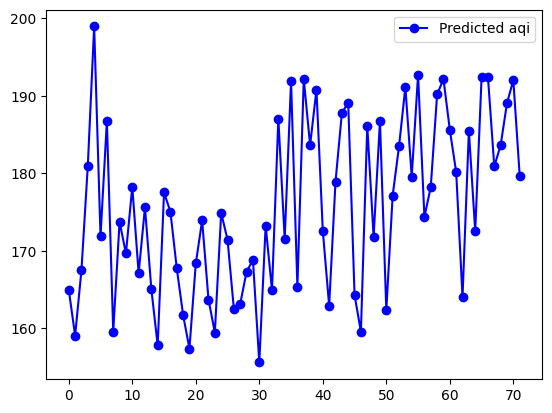

In [ ]:
plt.plot(aqi,label="Predicted aqi",marker="o",color="blue")
plt.legend()
plt.show()

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

last_timestamp = df['timestamp'].max()

# print(last_timestamp)

# Feature Engineering
df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_lag24'] = df['pm2_5'].shift(24)
df['pm2_5_lag48'] = df['pm2_5'].shift(48)

# df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
# df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
# df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
# df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]


features = ['temperature','no2', 'co', 'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7','pm2_5_lag24','pm2_5_lag48','dayofweek','month']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training
xgb_model =XGBRegressor(n_estimators=200,max_depth=2,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluate Final Test Set
mse = mean_squared_error(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_test - xgb_preds) / y_test)) * 100

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)
print("MAPE Test: {:.2f}%".format(mape_test))

# #US EPA Formula: AQI
# BP_high=None
# BP_low=None
# AQI_high=None
# AQI_low=None
# aqi=[]

# for i in xgb_preds:
#   if i>=0.0 and i<= 9.0:
#       BP_low=0.0
#       BP_high=9.0
#       AQI_low=0
#       AQI_high=50
#   elif i>=9.1 and i<=35.4:
#       BP_low=9.1
#       BP_high=35.4
#       AQI_low=51
#       AQI_high=100
#   elif i>=35.5 and i<=55.4:
#       BP_low=35
#       BP_high=55.4
#       AQI_low=101
#       AQI_high=150
#   elif i>=55.5 and i<=125.4:
#       BP_low=55.5
#       BP_high=125.4
#       AQI_low=151
#       AQI_high=200
#   elif i>=125.5 and i<=225.4:
#       BP_low=125.5
#       BP_high=225.4
#       AQI_low=152
#       AQI_high=300
#   elif i>=225.5 and i<=325.4:
#       BP_low=225.5
#       BP_high=325.4
#       AQI_low=301
#       AQI_high=500
#   AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
#   aqi.append(AQI)

# #creating future timestamps
# future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1),
#                                   periods=len(y_test),
#                                   freq='H')

# # Save predictions, calculations & features
# prediction_df = pd.DataFrame({"timestamp": future_timestamps,"actual":y_test.values,'predicted_pm2_5':xgb_preds,"calculated_aqi":aqi})
# prediction_df.to_csv("prediction.csv", index=False)
# X_test.to_csv("features.csv", index=False)

# model_dir = "AQI_prediction_model"
# os.makedirs(model_dir, exist_ok=True)

# # Saving model
# model_path = os.path.join(model_dir, "model.pkl")
# joblib.dump(xgb_model, model_path)

# # Save predictions and test features
# prediction_df.to_csv(os.path.join(model_dir, "predictions.csv"), index=False)
# X_test.to_csv(os.path.join(model_dir, "features.csv"), index=False)

# # Upload to Hopsworks Model Registry
# mr = project.get_model_registry()
# model = mr.python.create_model(
#     name="AQI_prediction_model",
#     metrics={"mae": mae, "mse": mse, "rmse": rmse, "r2": r2,"mape":mape},
#     description="PM2.5 predictions and Calculated AQI"
# )
# model.save(os.path.abspath(model_dir))

# print("Model, predictions, features, and metrics uploaded to registry.")



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.61s) 
MSE : 16.76822201142027
MAE : 2.964348737928603
RMSE: 4.094901953822615
R2  : 0.8006133057939889
MAPE Test: 2.82%


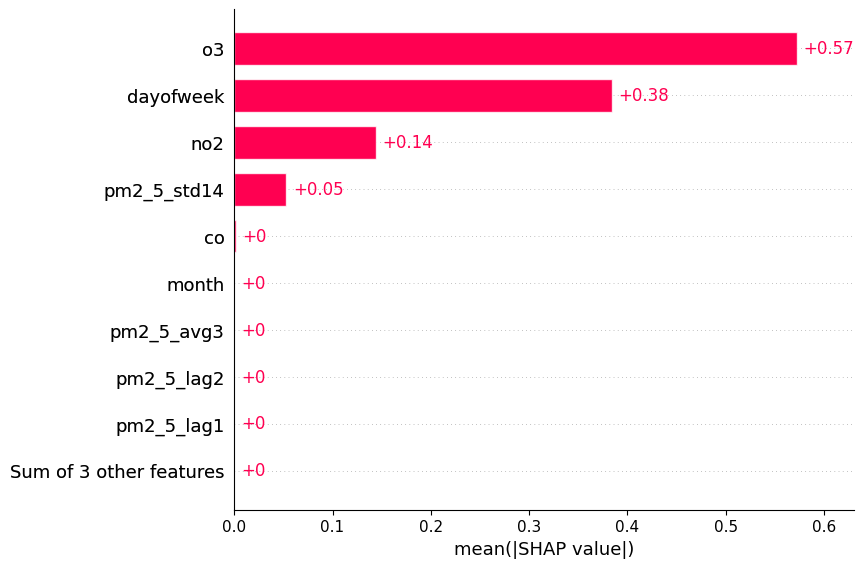

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
print(last_timestamp)

2025-08-11 11:20:13.741856+00:00


In [ ]:
print(df.tail())

                           timestamp  aqius main_pollutant  temperature  \
825 2025-08-11 07:26:31.635029+00:00     86             p2         38.0   
826 2025-08-11 08:32:43.866655+00:00     79             p2         39.0   
827 2025-08-11 09:28:19.591857+00:00     79             p2         40.0   
828 2025-08-11 10:25:36.585287+00:00     81             p2         40.0   
829 2025-08-11 11:20:13.741856+00:00     81             p2         39.0   

     humidity  wind_speed    aqi   pm2_5  pm10   no2     so2  co     no    o3  \
825      30.0        3.41  37.94  117.69  1.28  1.63  172.35   0  85.26  1.74   
826      29.0        3.06  32.93  111.06  1.08  1.38  143.62   0  80.59  0.98   
827      29.0        3.01  32.93  111.06  1.08  1.38  143.62   0  80.59  0.98   
828      28.0        2.67  32.46  110.54  1.43  1.39  146.08   0  78.23  1.05   
829      33.0        1.59  32.12  109.47  2.11  1.46  154.20   0  74.61  1.31   

     hour  dayofweek  target_aqi  
825     7          0       

In [ ]:
print(future_timestamps)

DatetimeIndex(['2025-08-10 19:28:52.433329+00:00',
               '2025-08-10 20:28:52.433329+00:00',
               '2025-08-10 21:28:52.433329+00:00',
               '2025-08-10 22:28:52.433329+00:00',
               '2025-08-10 23:28:52.433329+00:00',
               '2025-08-11 00:28:52.433329+00:00',
               '2025-08-11 01:28:52.433329+00:00',
               '2025-08-11 02:28:52.433329+00:00',
               '2025-08-11 03:28:52.433329+00:00',
               '2025-08-11 04:28:52.433329+00:00',
               '2025-08-11 05:28:52.433329+00:00',
               '2025-08-11 06:28:52.433329+00:00',
               '2025-08-11 07:28:52.433329+00:00',
               '2025-08-11 08:28:52.433329+00:00',
               '2025-08-11 09:28:52.433329+00:00',
               '2025-08-11 10:28:52.433329+00:00',
               '2025-08-11 11:28:52.433329+00:00',
               '2025-08-11 12:28:52.433329+00:00',
               '2025-08-11 13:28:52.433329+00:00',
               '2025-08-11 14:2

In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from xgboost import XGBRegressor
# from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

last_timestamp = df['timestamp'].max()

# print(last_timestamp)

# Feature Engineering
df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
# df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
# df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
# df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)
train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','so2','no2','co' ,'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7','pm2_5_avg14','month','dayofweek']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training
xgb_model =XGBRegressor(n_estimators=200,max_depth=2,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

# Evaluate Final Test Set
mse = mean_squared_error(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)
rmse=np.sqrt(mse)
mape = np.mean(np.abs((y_test - xgb_preds) / y_test)) * 100

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)
print("MAPE Test: {:.2f}%".format(mape))

# #US EPA Formula: AQI
# BP_high=None
# BP_low=None
# AQI_high=None
# AQI_low=None
# aqi=[]

# for i in xgb_preds:
#   if i>=0.0 and i<= 9.0:
#       BP_low=0.0
#       BP_high=9.0
#       AQI_low=0
#       AQI_high=50
#   elif i>=9.1 and i<=35.4:
#       BP_low=9.1
#       BP_high=35.4
#       AQI_low=51
#       AQI_high=100
#   elif i>=35.5 and i<=55.4:
#       BP_low=35
#       BP_high=55.4
#       AQI_low=101
#       AQI_high=150
#   elif i>=55.5 and i<=125.4:
#       BP_low=55.5
#       BP_high=125.4
#       AQI_low=151
#       AQI_high=200
#   elif i>=125.5 and i<=225.4:
#       BP_low=125.5
#       BP_high=225.4
#       AQI_low=152
#       AQI_high=300
#   elif i>=225.5 and i<=325.4:
#       BP_low=225.5
#       BP_high=325.4
#       AQI_low=301
#       AQI_high=500
#   AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
#   aqi.append(AQI)

# #creating future timestamps
# future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1),
#                                   periods=len(y_test),
#                                   freq='H')

# # Save predictions, calculations & features
# prediction_df = pd.DataFrame({"timestamp": future_timestamps,"actual":y_test.values,'predicted_pm2_5':xgb_preds,"calculated_aqi":aqi})
# prediction_df.to_csv("prediction.csv", index=False)
# X_test.to_csv("features.csv", index=False)

# model_dir = "AQI_prediction_model"
# os.makedirs(model_dir, exist_ok=True)

# # Saving model
# model_path = os.path.join(model_dir, "model.pkl")
# joblib.dump(xgb_model, model_path)

# # Save predictions and test features
# prediction_df.to_csv(os.path.join(model_dir, "predictions.csv"), index=False)
# X_test.to_csv(os.path.join(model_dir, "features.csv"), index=False)

# # Upload to Hopsworks Model Registry
# mr = project.get_model_registry()
# model = mr.python.create_model(
#     name="AQI_prediction_model",
#     metrics={"mae": mae, "mse": mse, "rmse": rmse, "r2": r2,"mape":mape},
#     description="PM2.5 predictions and Calculated AQI"
# )
# model.save(os.path.abspath(model_dir))

# print("Model, predictions, features, and metrics uploaded to registry.")



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.52s) 
MSE : 18.863576130733534
MAE : 3.3656493631998696
RMSE: 4.34322186063912
R2  : 0.8455960433399533
MAPE Test: 3.23%


In [ ]:
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
q1=df['pm2_5'].quantile(0.25)
q3=df['pm2_5'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-(1.5*iqr)
upper_bound=q3+(1.5*iqr)
df_clean = df[(df['pm2_5'] >= lower_bound) & (df['pm2_5'] <= upper_bound)]
print(f"Original shape: {df.shape}, Cleaned shape: {df_clean.shape}")

Original shape: (841, 26), Cleaned shape: (828, 26)


Train and Test Scores


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import hopsworks

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

# Sort by time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp").reset_index(drop=True)

# Remove missing target
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

#  Split first
train_df = df.iloc[:-72, :].copy()
test_df = df.iloc[-72:, :].copy()

#  Create lag/rolling features for TRAIN
train_df['pm2_5_lag1'] = train_df['pm2_5'].shift(1)
train_df['pm2_5_lag2'] = train_df['pm2_5'].shift(2)
train_df['pm2_5_avg3'] = train_df['pm2_5'].rolling(window=3).mean()
train_df['pm2_5_avg7'] = train_df['pm2_5'].rolling(window=7).mean()
train_df['pm2_5_std7'] = train_df['pm2_5'].rolling(window=7).std()
train_df['pm2_5_avg14'] = train_df['pm2_5'].rolling(window=14).mean()
train_df['pm2_5_std14'] = train_df['pm2_5'].rolling(window=14).std()
train_df['pm2_5_max'] = train_df['pm2_5'].rolling(window=7).max()

#  Create lag/rolling features for TEST using last rows from TRAIN
needed_rows = 14  # largest rolling window
test_with_history = pd.concat([train_df.iloc[-needed_rows:], test_df], axis=0)

test_with_history['pm2_5_lag1'] = test_with_history['pm2_5'].shift(1)
test_with_history['pm2_5_lag2'] = test_with_history['pm2_5'].shift(2)
test_with_history['pm2_5_avg3'] = test_with_history['pm2_5'].rolling(window=3).mean()
test_with_history['pm2_5_avg7'] = test_with_history['pm2_5'].rolling(window=7).mean()
test_with_history['pm2_5_std7'] = test_with_history['pm2_5'].rolling(window=7).std()
test_with_history['pm2_5_avg14'] = test_with_history['pm2_5'].rolling(window=14).mean()
test_with_history['pm2_5_std14'] = test_with_history['pm2_5'].rolling(window=14).std()
test_with_history['pm2_5_max'] = test_with_history['pm2_5'].rolling(window=7).max()

# Keep only the actual test rows
test_df = test_with_history.loc[test_df.index]

# =====  Add date features =====
train_df['month'] = train_df['timestamp'].dt.month
train_df['dayofweek'] = train_df['timestamp'].dt.dayofweek

test_df['month'] = test_df['timestamp'].dt.month
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

# Drop NaNs from lag creation
train_df = train_df.dropna()
test_df = test_df.dropna()

#  Train model
features = [
    'temperature','no2','co','no','o3','humidity',
    'pm2_5_lag1','pm2_5_lag2','pm2_5_avg3','pm2_5_avg7','pm2_5_std7',
    'pm2_5_avg14','pm2_5_std14','pm2_5_max','dayofweek','month'
]
target = 'pm2_5'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=2, learning_rate=0.1,
    reg_alpha=0.2, reg_lambda=2.0, subsample=0.6,
    colsample_bytree=0.6, random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

train_pred = xgb_model.predict(X_train_scaled)
test_pred = xgb_model.predict(X_test_scaled)

# Scores
print("train_r2:", r2_score(y_train, train_pred))
print("test_r2:", r2_score(y_test, test_pred))
print("rmse_train:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("rmse_test:", np.sqrt(mean_squared_error(y_test, test_pred)))




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.56s) 
train_r2: 0.982148579286925
test_r2: 0.8677548218264578
rmse_train: 4.626420790255456
rmse_test: 4.01950640520978


In [ ]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Fake data
np.random.seed(42)
n = 1000
y = np.arange(n) + np.random.normal(0, 5, n)  # Mostly increasing with noise
df = pd.DataFrame({"value": y})

# Create lag *before* split (LEAKY)
df["lag1"] = df["value"].shift(1)
df.dropna(inplace=True)

X = df[["lag1"]]
y = df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² with leakage:", r2_score(y_test, y_pred))


R² with leakage: -3.277056876030599


In [ ]:
# Redo split first
train_vals, test_vals = train_test_split(df, shuffle=False, test_size=0.2)

# Generate lag separately for train & test
train_vals["lag1"] = train_vals["value"].shift(1)
test_vals["lag1"] = test_vals["value"].shift(1)

train_vals.dropna(inplace=True)
test_vals.dropna(inplace=True)

X_train = train_vals[["lag1"]]
y_train = train_vals["value"]
X_test = test_vals[["lag1"]]
y_test = test_vals["value"]

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² without leakage:", r2_score(y_test, y_pred))


R² without leakage: -3.336993341446015


In [ ]:
# print("\nCalculating Permutation Importance...")
# perm_importance = permutation_importance(
#     xgb_model, X_test_scaled, y_test,
#     n_repeats=10,
#     random_state=42,
#     scoring='r2'
# )

# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# print("\nPermutation Importance (R² drop when shuffled):")
# print(importance_df)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import hopsworks

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

# Sort by time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp").reset_index(drop=True)

# Remove missing target
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

#  Split first
train_df = df.iloc[:-72, :].copy()
test_df = df.iloc[-72:, :].copy()

#  Create lag/rolling features for TRAIN
train_df['pm2_5_lag1'] = train_df['pm2_5'].shift(1)
train_df['pm2_5_lag2'] = train_df['pm2_5'].shift(2)
train_df['pm2_5_avg3'] = train_df['pm2_5'].rolling(window=3).mean()
train_df['pm2_5_avg7'] = train_df['pm2_5'].rolling(window=7).mean()
train_df['pm2_5_std7'] = train_df['pm2_5'].rolling(window=7).std()
train_df['pm2_5_avg14'] = train_df['pm2_5'].rolling(window=14).mean()
train_df['pm2_5_std14'] = train_df['pm2_5'].rolling(window=14).std()
train_df['pm2_5_max'] = train_df['pm2_5'].rolling(window=7).max()

#  Create lag/rolling features for TEST using last rows from TRAIN
needed_rows = 14  # largest rolling window
test_with_history = pd.concat([train_df.iloc[-needed_rows:], test_df], axis=0)

test_with_history['pm2_5_lag1'] = test_with_history['pm2_5'].shift(1)
test_with_history['pm2_5_lag2'] = test_with_history['pm2_5'].shift(2)
test_with_history['pm2_5_avg3'] = test_with_history['pm2_5'].rolling(window=3).mean()
test_with_history['pm2_5_avg7'] = test_with_history['pm2_5'].rolling(window=7).mean()
test_with_history['pm2_5_std7'] = test_with_history['pm2_5'].rolling(window=7).std()
test_with_history['pm2_5_avg14'] = test_with_history['pm2_5'].rolling(window=14).mean()
test_with_history['pm2_5_std14'] = test_with_history['pm2_5'].rolling(window=14).std()
test_with_history['pm2_5_max'] = test_with_history['pm2_5'].rolling(window=7).max()

# Keep only the actual test rows
test_df = test_with_history.loc[test_df.index]

#   Add date features
train_df['month'] = train_df['timestamp'].dt.month
train_df['dayofweek'] = train_df['timestamp'].dt.dayofweek

test_df['month'] = test_df['timestamp'].dt.month
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

# Drop NaNs from lag creation
train_df = train_df.dropna()
test_df = test_df.dropna()

#  Train model
features = [
    'temperature','no2','co','no','o3','humidity',
    'pm2_5_lag1','pm2_5_lag2','pm2_5_avg3','pm2_5_avg7','pm2_5_std7',
    'pm2_5_avg14','pm2_5_std14','pm2_5_max','dayofweek','month'
]
target = 'pm2_5'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# # Scale
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Model
xgb_model == GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

train_pred = xgb_model.predict(X_train_scaled)
test_pred = xgb_model.predict(X_test_scaled)

# Scores
print("train_r2:", r2_score(y_train, train_pred))
print("test_r2:", r2_score(y_test, test_pred))
print("rmse_train:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("rmse_test:", np.sqrt(mean_squared_error(y_test, test_pred)))




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.55s) 
train_r2: 0.982148579286925
test_r2: 0.8677548218264578
rmse_train: 4.626420790255456
rmse_test: 4.01950640520978


In [ ]:
import matplotlib.pyplot as plt

# Sort by importance
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Importance'], color='coral')
plt.xlabel("R² Drop When Shuffled (Permutation Importance)")
plt.title("Feature Importance (Permutation Method)")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
df=[{'y test:':y_test.values,
     'xgb preds':xgb_preds}]
df=pd.DataFrame(df)
print(df.head(10))

                                             y test:  \
0  [123.33, 122.13, 122.94, 123.83, 124.62, 124.6...   

                                           xgb preds  
0  [129.8322, 121.339584, 120.761185, 120.57906, ...  


In [ ]:
import matplotlib.pyplot as plt

plt.plot(xgb_preds,color="red")
plt.plot(y_test.values,color="blue")
plt.show()

In [ ]:
!pip install hopsworks

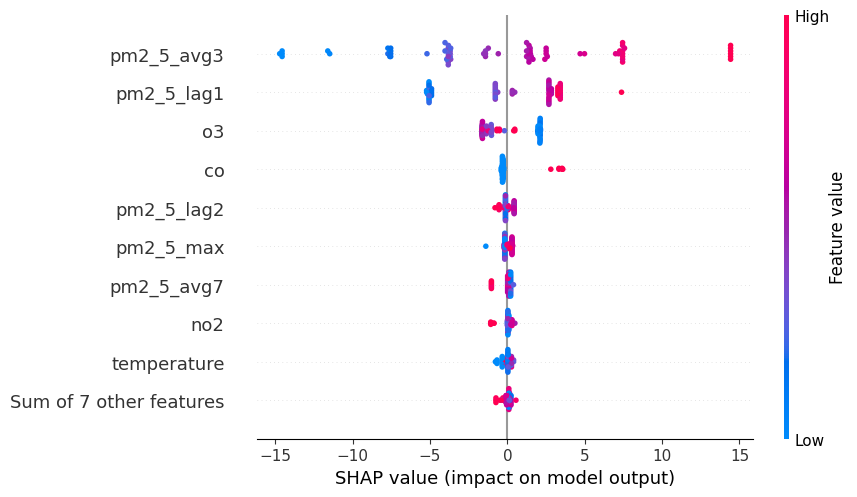

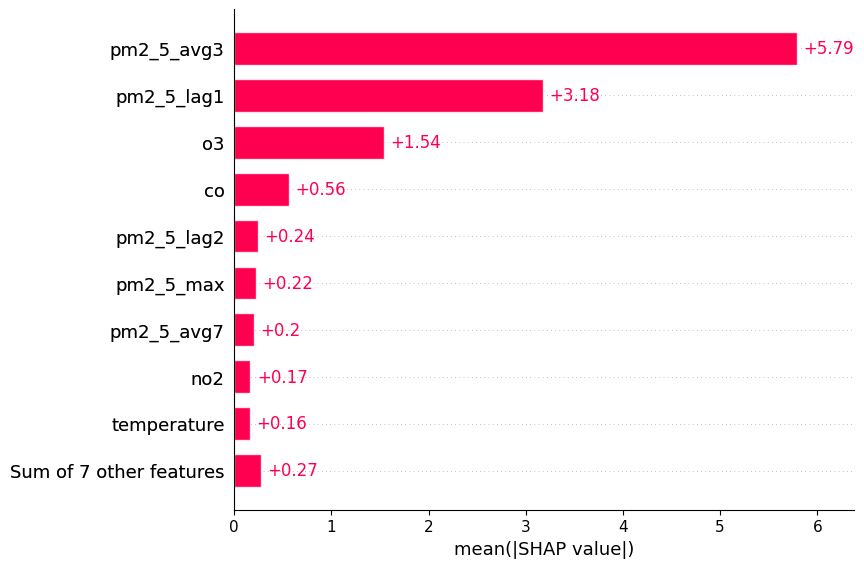

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

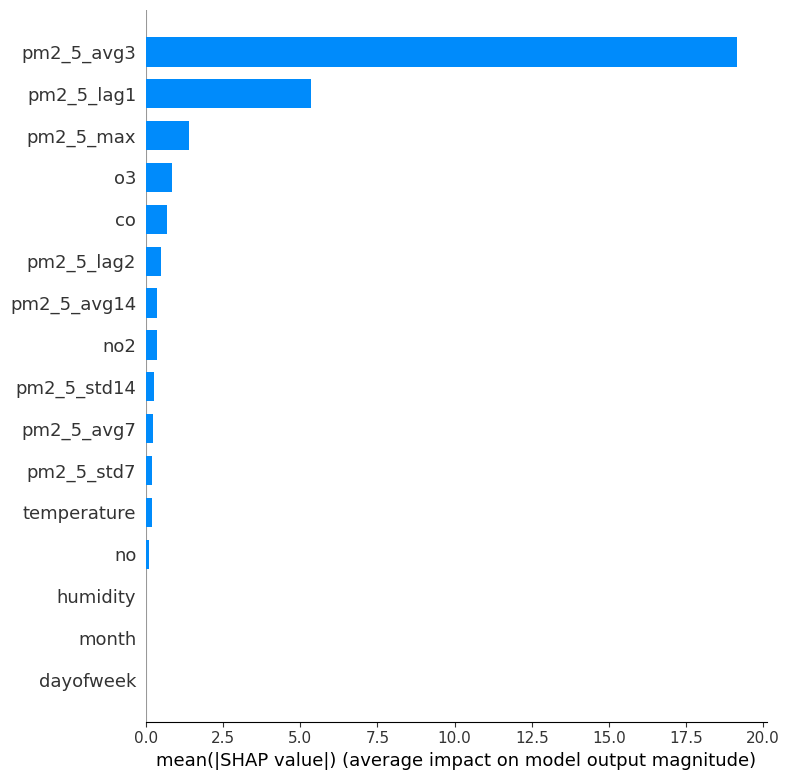

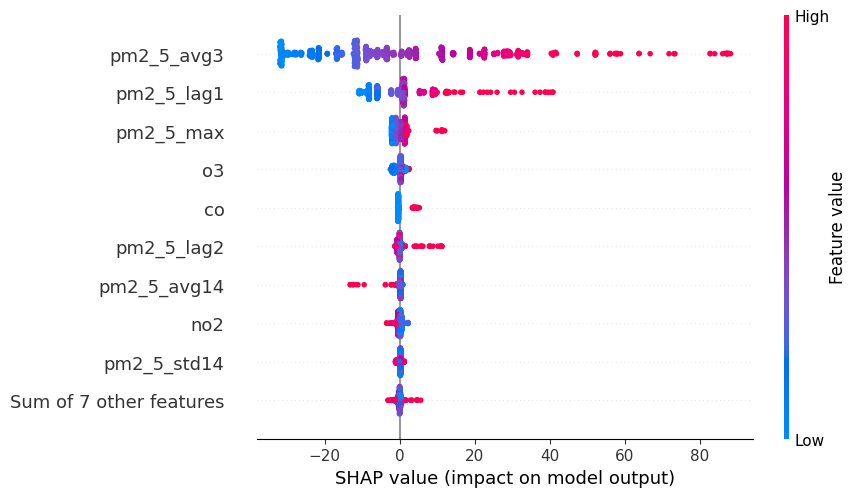

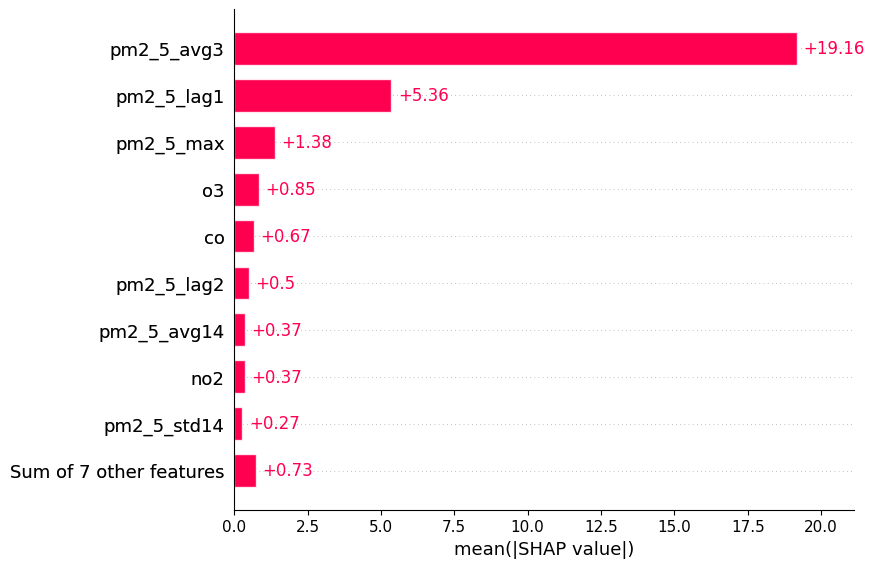

In [ ]:
import shap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

plt.figure(figsize=(10, 6))
shap.plots.beeswarm(shap_values)
plt.show()

plt.figure(figsize=(20, 6))
shap.plots.bar(shap_values)
plt.show()


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import hopsworks

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

# Sort by time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp").reset_index(drop=True)

# Remove missing target
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# ===== Split first =====
train_df = df.iloc[:-72, :].copy()
test_df = df.iloc[-72:, :].copy()

# train_df['pm2_5']=np.log1p(train_df['pm2_5'])
# test_df['pm2_5']=np.log1p(test_df['pm2_5'])

#  Create lag/rolling features for TRAIN
train_df['pm2_5_lag1'] = train_df['pm2_5'].shift(1)
train_df['pm2_5_lag2'] = train_df['pm2_5'].shift(2)
train_df['pm2_5_mean1'] = train_df['pm2_5'].expanding(min_periods=24).mean()
train_df['pm2_5_mean2'] = train_df['pm2_5'].expanding(min_periods=48).mean()
# train_df['pm2_5_mean3'] = train_df['pm2_5'].expanding(min_periods=72).mean()


# Create lag/rolling features for TEST using last rows from TRAIN
needed_rows = 48  # largest rolling window
test = pd.concat([train_df.iloc[-needed_rows:], test_df], axis=0)

test['pm2_5_lag1'] = test['pm2_5'].shift(1)
test['pm2_5_lag2'] = test['pm2_5'].shift(2)
test['pm2_5_mean1'] = test['pm2_5'].expanding(min_periods=24).mean()
test['pm2_5_mean2'] = test['pm2_5'].expanding(min_periods=48).mean()
# test['pm2_5_mean3'] = test['pm2_5'].expanding(min_periods=72).mean()


# Keep only the actual test rows
test_df = test.loc[test_df.index]

#   Add date features
train_df['month'] = train_df['timestamp'].dt.month
train_df['dayofweek'] = train_df['timestamp'].dt.dayofweek

test_df['month'] = test_df['timestamp'].dt.month
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

# Drop NaNs from lag creation
train_df = train_df.dropna()
test_df = test_df.dropna()

#  Train model
features = [
    'temperature','no2','co','no','o3','humidity',
    'pm2_5_lag1','pm2_5_lag2','pm2_5_mean1','pm2_5_mean2','month'
]
target = 'pm2_5'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# # Scale
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Model
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=2, learning_rate=0.1,reg_alpha=0.2, reg_lambda=2.0, subsample=0.6,colsample_bytree=0.6,min_child_weight=7, random_state=42)
xgb_model.fit(X_train, y_train)

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# Scores
print("train_r2:", r2_score(y_train, train_pred))
print("test_r2:", r2_score(y_test, test_pred))
print("rmse_train:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("rmse_test:", np.sqrt(mean_squared_error(y_test, test_pred)))


ModuleNotFoundError: No module named 'hopsworks'

Train and Test Scores


---



In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing and Feature Engineering
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# df['pm2_5']=np.log1p(df['pm2_5'])
# df['no2']=np.log1p(df['no2'])
# df['o3']=np.log1p(df['o3'])
# df['co']=np.log1p(df['co'])
# df['no']=np.log1p(df['no'])
# df['humidity']=np.log1p(df['humidity'])
# df['temperature']=np.log1p(df['temperature'])

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7']  = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_std7']  = df['pm2_5'].rolling(window=7).std()
df['pm2_5_avg14']  = df['pm2_5'].rolling(window=14).mean()
df['pm2_5_std14']  = df['pm2_5'].rolling(window=14).std()
# df['pm2_5_max']=df['pm2_5'].rolling(window=7).max()

df = df.dropna()

df['month'] = df['timestamp'].dt.month
# df['dayofweek'] = df['timestamp'].dt.dayofweek

# Last 72 rows = Test set (future data)

train = df.iloc[:-72, :]
test = df.iloc[-72:]

features = ['temperature','no2', 'co', 'no', 'o3','humidity','pm2_5_lag1', 'pm2_5_lag2', 'pm2_5_avg3','pm2_5_avg7','pm2_5_std7','month']
target = 'pm2_5'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Final Model Training on Full Training Set
xgb_model =XGBRegressor(n_estimators=100,max_depth=2,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,random_state=42)
xgb_model.fit(X_train_scaled, y_train)
train = xgb_model.predict(X_train_scaled)
test = xgb_model.predict(X_test_scaled)

# X_test=np.expm1(X_test)
# y_test=np.expm1(y_test)
# train=np.expm1(train)
# test=np.expm1(test)

train_r2=r2_score(y_train,train)
test_r2=r2_score(y_test,test)

rmse_train=np.sqrt(mean_squared_error(y_train,train))
rmse_test=np.sqrt(mean_squared_error(y_test,test))

print("train_r2:",train_r2)
print("test_r2:",test_r2)
print("rmse_train:",rmse_train)
print("rmse_test:",rmse_test)

accuracy_train=rmse_train/y_train.mean()*100
accuracy_test=rmse_test/y_test.mean()*100
print("accuracy_train:",accuracy_train)
print("accuracy_test:",accuracy_test)

mape_train = np.mean(np.abs((y_train - train) / y_train)) * 100
mape_test = np.mean(np.abs((y_test - test) / y_test)) * 100

print("MAPE Train: {:.2f}%".format(mape_train))
print("MAPE Test: {:.2f}%".format(mape_test))

# Adj_R2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
# print("Adjusted R2 Score:",Adj_R2)




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.50s) 
train_r2: 0.9824882729515069
test_r2: 0.8978610617183889
rmse_train: 4.564863373023357
rmse_test: 6.2545397907103695
accuracy_train: 6.200362567256713
accuracy_test: 8.502187534100113
MAPE Train: 5.03%
MAPE Test: 6.18%


**Final Code**

---



In [ ]:
!pip install hopsworks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.6/258.6 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
print(X_test.shape)
print(y_test.shape)

(72, 12)
(72,)


In [ ]:
# from sklearn.model_selection import TimeSeriesSplit
# import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import joblib
import hopsworks
import os

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

#sorting data that hopsworks shuffled up
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp")
df = df.reset_index(drop=True)

# Preprocessing
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

# print(df.shape)

#log transform
# df['pm2_5']=np.log1p(df['pm2_5'])
# df['no2']=np.log1p(df['no2'])
# df['o3']=np.log1p(df['o3'])
# df['co']=np.log1p(df['co'])
# df['no']=np.log1p(df['no'])
# df['humidity']=np.log1p(df['humidity'])
# df['temperature']=np.log1p(df['temperature'])

# sns.histplot(df["pm2_5"], bins=50, kde=True)
# plt.title("Distribution of PM2.5")
# plt.show()


last_timestamp = df['timestamp'].max()

df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm2_5_lag2'] = df['pm2_5'].shift(2)
df['pm2_5_avg3'] = df['pm2_5'].rolling(window=3).mean()
df['pm2_5_avg7'] = df['pm2_5'].rolling(window=7).mean()
df['pm2_5_std7'] = df['pm2_5'].rolling(window=7).std()
# df['pm2_5_max'] = df['pm2_5'].rolling(window=7).max()

# date features
df['month'] = df['timestamp'].dt.month
# df['dayofweek'] = df['timestamp'].dt.dayofweek

df = df.dropna()

# Split into train/test
train_df = df.iloc[:-72].copy()
test_df = df.iloc[-72:].copy()


# Define features/target
features = ['temperature','no2','co','no','o3','humidity','pm2_5_lag1','pm2_5_lag2','pm2_5_avg3','pm2_5_avg7','pm2_5_std7','month']
target = 'pm2_5'

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]


# Final Model Training
xgb_model =XGBRegressor(n_estimators=200,max_depth=2,learning_rate=0.1,reg_alpha=0.2,reg_lambda=2.0,subsample=0.6,colsample_bytree=0.6,min_child_weight=7,random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

#inverse of log
# y_test=np.expm1(y_test)
# xgb_preds=np.expm1(xgb_preds)


# Calculate metrics
# Evaluate Final Test Set
mse = mean_squared_error(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)
rmse=np.sqrt(mse)

print("MSE :", mse)
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

mape = np.mean(np.abs((y_test - xgb_preds) / y_test)) * 100
print("MAPE Test: {:.2f}%".format(mape))

Adj_R2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 Score:",Adj_R2)

#US EPA Formula: AQI
BP_high=None
BP_low=None
AQI_high=None
AQI_low=None
aqi=[]

for i in np.round(xgb_preds,1):
  if i>0.0 and i<= 12.0:
      BP_low=0.0
      BP_high=12.0
      AQI_low=0
      AQI_high=50
  elif i>12.0 and i<=35.4:
      BP_low=12.1
      BP_high=35.4
      AQI_low=51
      AQI_high=100
  elif i>35.4 and i<=55.4:
      BP_low=35.5
      BP_high=55.4
      AQI_low=101
      AQI_high=150
  elif i>55.4 and i<=150.4:
      BP_low=55.5
      BP_high=150.4
      AQI_low=151
      AQI_high=200
  elif i>150.4 and i<=250.4:
      BP_low=150.5
      BP_high=250.4
      AQI_low=201
      AQI_high=300
  elif i>=250.5 and i<=350.4:
      BP_low=250.5
      BP_high=350.4
      AQI_low=301
      AQI_high=400
  elif i>350.4 and i<=500.4:
      BP_low=350.5
      BP_high=500.4
      AQI_low=401
      AQI_high=500
  else:
    aqi.append(None)
    continue

  AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
  aqi.append(AQI)

#creating future timestamps
future_timestamps = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1),periods=len(y_test),freq='H')

# Save predictions, calculations & features
prediction_df = pd.DataFrame({"timestamp": future_timestamps,"actual":y_test.values,'predicted_pm2_5':np.round(xgb_preds,1),"calculated_aqi":aqi})
prediction_df.to_csv("prediction.csv", index=False)
X_test.to_csv("features.csv", index=False)

model_dir = "AQI_prediction_model"
os.makedirs(model_dir, exist_ok=True)

# Saving model
model_path = os.path.join(model_dir, "model.pkl")
joblib.dump(xgb_model, model_path)

# Save predictions and test features
prediction_df.to_csv(os.path.join(model_dir, "predictions.csv"), index=False)
X_test.to_csv(os.path.join(model_dir, "features.csv"), index=False)

# Upload to Hopsworks Model Registry
mr = project.get_model_registry()
model = mr.python.create_model(
    name="AQI_prediction_model",
    metrics={"mae": mae, "mse": mse, "rmse": rmse, "r2": r2,"mape":mape},
    description="PM2.5 predictions and Calculated AQI"
)
model.save(os.path.abspath(model_dir))

print("Model, predictions, features, and metrics uploaded to registry.")



To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


Connection closed.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.04s) 
Train shape: (899, 23)
Test shape: (72, 23)
X_train: (899, 12) X_test: (72, 12)
y_train: (899,) y_test: (72,)
MSE : 38.98144877768284
MAE : 4.316792868508234
RMSE: 6.243512535238705
R2  : 0.9345286775808052
MAPE Test: 7.44%
Adjusted R2 Score: 0.9212124764107994


  0%|          | 0/6 [00:00<?, ?it/s]

Uploading /content/AQI_prediction_model/predictions.csv: 0.000%|          | 0/4561 elapsed<00:00 remaining<?

Uploading /content/AQI_prediction_model/features.csv: 0.000%|          | 0/6899 elapsed<00:00 remaining<?

Uploading /content/AQI_prediction_model/model.pkl: 0.000%|          | 0/181044 elapsed<00:00 remaining<?

Model created, explore it at https://c.app.hopsworks.ai:443/p/1238171/models/AQI_prediction_model/114
Model, predictions, features, and metrics uploaded to registry.


In [ ]:
p={'y test':y_test.values,'xgb preds':np.round(xgb_preds,1),'aqi':aqi}
p=pd.DataFrame(p)
print(p.head(30))

    y test   xgb preds         aqi
0    45.43   46.799999  128.824119
1    45.27   46.599998  128.331655
2    45.62   47.000000  129.316583
3    49.29   47.599998  130.793966
4    51.48   52.900002  143.844225
5    58.46   55.400002  150.948367
6    58.46   62.200001  154.459431
7    60.48   60.200001  153.426765
8    60.48   62.400002  154.562698
9    51.11   62.099998  154.407797
10   47.10   53.500000  145.321608
11   46.61   50.299999  137.442209
12   48.05   49.900002  136.457290
13   51.96   46.700001  128.577891
14   55.22   50.400002  137.688446
15   70.18   56.599998  151.567965
16   74.07   70.800003  158.899896
17   75.79   75.400002  161.275027
18   76.50   75.000000  161.068493
19   71.36   72.099998  159.571127
20   71.36   68.900002  157.918863
21   71.43   70.199997  158.590093
22   73.69   71.400002  159.209695
23   76.93   75.500000  161.326660
24   80.55   77.699997  162.462591
25   92.57   83.199997  165.302422
26   99.15   98.800003  173.357220
27  109.14  108.1999

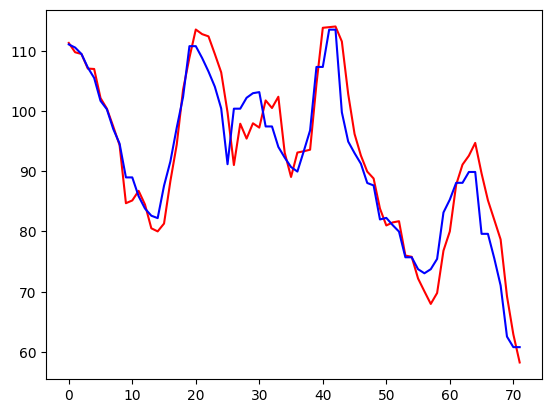

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xgb_preds,color="red")
plt.plot(y_test.values,color="blue")
plt.show()

end----------------------------------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# print(train_df.isnull().sum())

features = [
    'temperature','no2','co','no','o3','humidity',
    'pm2_5_lag1','pm2_5_lag2','pm2_5_avg3','pm2_5_avg7',
    'pm2_5_std7','pm2_5_max',
    'dayofweek','month'
]

corr_values = train_df[features].corrwith(train_df['pm2_5'])

plt.figure(figsize=(8, 6))
sns.heatmap(corr_values.to_frame(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation with PM2.5')
plt.show()


KeyError: "['pm2_5_max'] not in index"

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import hopsworks

# Login to Hopsworks and load data
project = hopsworks.login(api_key_value="RI6aVh8JRlgiuVaz.bGgoZw1u0Lf54YkBoZyivKakNFHWMHcQE3z5hCk4GOpTbHKf7jHLol2cXmSfZSMC")
fs = project.get_feature_store()
fg = fs.get_feature_group(name="lahore_aqi_group", version=1)
df = fg.select_all().read()

# Sort by time
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values("timestamp").reset_index(drop=True)

# Remove missing target
df.dropna(subset=["target_aqi"], inplace=True)
df.dropna(axis=1, how='all', inplace=True)

#  Split first
train_df = df.iloc[:-72, :].copy()
test_df = df.iloc[-72:, :].copy()

# train_df['pm2_5']=np.log1p(train_df['pm2_5'])
# test_df['pm2_5']=np.log1p(test_df['pm2_5'])

#  Create lag/rolling features for TRAIN
train_df['pm2_5_lag1'] = train_df['pm2_5'].shift(1)
train_df['pm2_5_lag2'] = train_df['pm2_5'].shift(2)
train_df['pm2_5_avg3'] = train_df['pm2_5'].rolling(window=3).mean()
train_df['pm2_5_avg7'] = train_df['pm2_5'].rolling(window=7).mean()
train_df['pm2_5_std7'] = train_df['pm2_5'].rolling(window=7).std()
train_df['pm2_5_avg14'] = train_df['pm2_5'].rolling(window=14).mean()
train_df['pm2_5_std14'] = train_df['pm2_5'].rolling(window=14).std()
train_df['pm2_5_max'] = train_df['pm2_5'].rolling(window=7).max()

# Create lag/rolling features for TEST using last rows from TRAIN
needed_rows = 14  # largest rolling window
test = pd.concat([train_df.iloc[-needed_rows:], test_df], axis=0)

test['pm2_5_lag1'] = test['pm2_5'].shift(1)
test['pm2_5_lag2'] = test['pm2_5'].shift(2)
test['pm2_5_avg3'] = test['pm2_5'].rolling(window=3).mean()
test['pm2_5_avg7'] = test['pm2_5'].rolling(window=7).mean()
test['pm2_5_std7'] = test['pm2_5'].rolling(window=7).std()
test['pm2_5_avg14'] = test['pm2_5'].rolling(window=14).mean()
test['pm2_5_std14'] = test['pm2_5'].rolling(window=14).std()
test['pm2_5_max'] = test['pm2_5'].rolling(window=7).max()

# Keep only the actual test rows
test_df = test.loc[test_df.index]

# =====  Add date features =====
train_df['month'] = train_df['timestamp'].dt.month
train_df['dayofweek'] = train_df['timestamp'].dt.dayofweek

test_df['month'] = test_df['timestamp'].dt.month
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

# Drop NaNs from lag creation
train_df = train_df.dropna()
test_df = test_df.dropna()

# ===== Train model =====
features = [
    'temperature','no2','co','no','o3','humidity','pm2_5_lag1','pm2_5_lag2','pm2_5_avg7','pm2_5_std7',
    'pm2_5_avg3','pm2_5_max','month']
target = 'pm2_5'

#
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# # Scale
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# Model
xgb_model = XGBRegressor(
    n_estimators=100, max_depth=2, learning_rate=0.1,
    reg_alpha=0.2, reg_lambda=2.0, subsample=0.6,
    colsample_bytree=0.6,min_child_weight=5,random_state=42
)
xgb_model.fit(X_train, y_train)

train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# train_pred=np.expm1(train_pred)
# test_pred=np.expm1(test_pred)
# y_train=np.expm1(y_train)
# y_test=np.expm1(y_test)

# Scores
print("train_r2:", r2_score(y_train, train_pred))
print("test_r2:", r2_score(y_test, test_pred))
print("rmse_train:", np.sqrt(mean_squared_error(y_train, train_pred)))
print("rmse_test:", np.sqrt(mean_squared_error(y_test, test_pred)))


Connection closed.




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1238171
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.93s) 
train_r2: 0.9780553480795854
test_r2: 0.8021567105565782
rmse_train: 5.137329415771071
rmse_test: 4.305383660881814


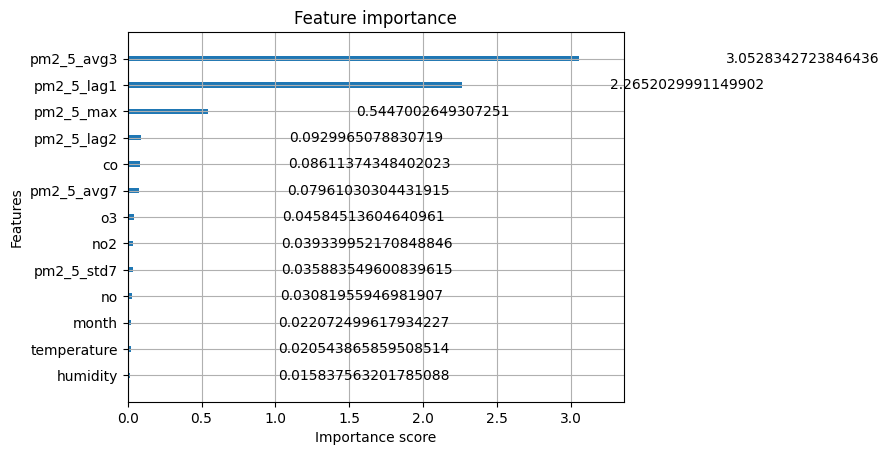

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, importance_type='gain')
plt.show()

In [ ]:
print(X_train)

     temperature   no2  co     no     o3  pm10  humidity  pm2_5_lag1  \
13          32.0  2.65   0  66.77  16.67  6.47      63.0       90.62   
14          33.0  2.41   0  73.18  15.50  5.24      69.0       97.98   
15          34.0  2.21   0  84.02  15.03  4.08      57.0      101.23   
16          34.0  1.79   0  91.51  10.94  2.50      62.0      105.21   
17          36.0  1.36   0  93.07   8.70  1.74      61.0      103.76   
..           ...   ...  ..    ...    ...   ...       ...         ...   
777         31.0  1.20   3  23.67   4.67  8.26      70.0      104.02   
778         32.0  1.50   1  55.06   3.92  4.79      69.0      107.30   
779         33.0  1.50   1  55.06   3.92  4.79      55.0      118.57   
780         34.0  1.12   0  89.46   2.02  1.29      54.0      118.57   
781         35.0  1.12   0  89.46   2.02  1.29      61.0      129.37   

     pm2_5_lag2  pm2_5_avg3  pm2_5_avg7  pm2_5_std7  pm2_5_avg14  pm2_5_std14  \
13        85.65   91.416667   79.834286   11.743673   

In [ ]:
print(xgb_preds)

[4.7910357 4.7733707 4.7733707 4.7000327 4.6944838 4.676959  4.6731844
 4.713747  4.707516  4.6904445 4.673926  4.629942  4.6260853 4.6064234
 4.610108  4.6130342 4.746856  4.7711163 4.792727  4.757973  4.756873
 4.7561994 4.7440705 4.7216926 4.7167873 4.7167873 4.674641  4.658273
 4.6223483 4.598699  4.5519266 4.445203  4.441035  4.458404  4.4376245
 4.4130135 4.375171  4.4058266 4.4795685 4.543585  4.6408677 4.687167
 4.727386  4.7301674 4.7301674 4.7271576 4.6810718 4.604455  4.5578384
 4.599386  4.5932474 4.6177797 4.6092243 4.6340656 4.6150393 4.6184025
 4.5125985 4.4969006 4.5472436 4.536882  4.5561953 4.6795897 4.6945887
 4.7229657 4.723557  4.713871  4.6652184 4.59982   4.553669  4.5073013
 4.5093203 4.4384274]


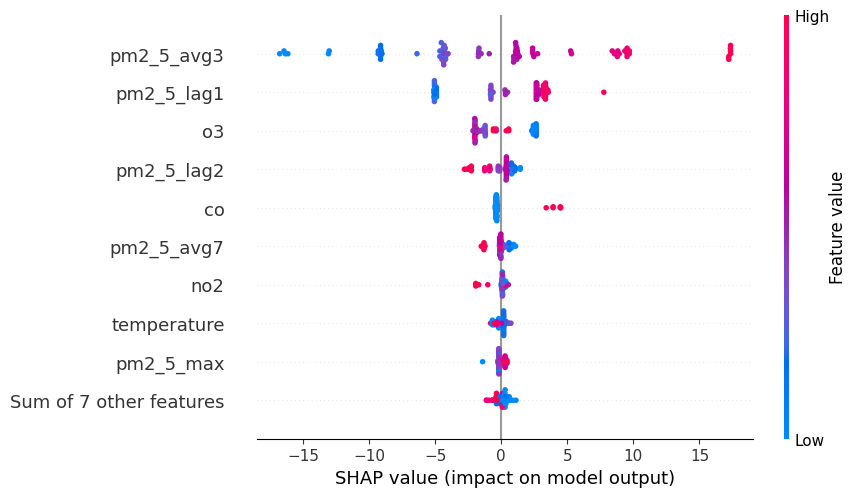

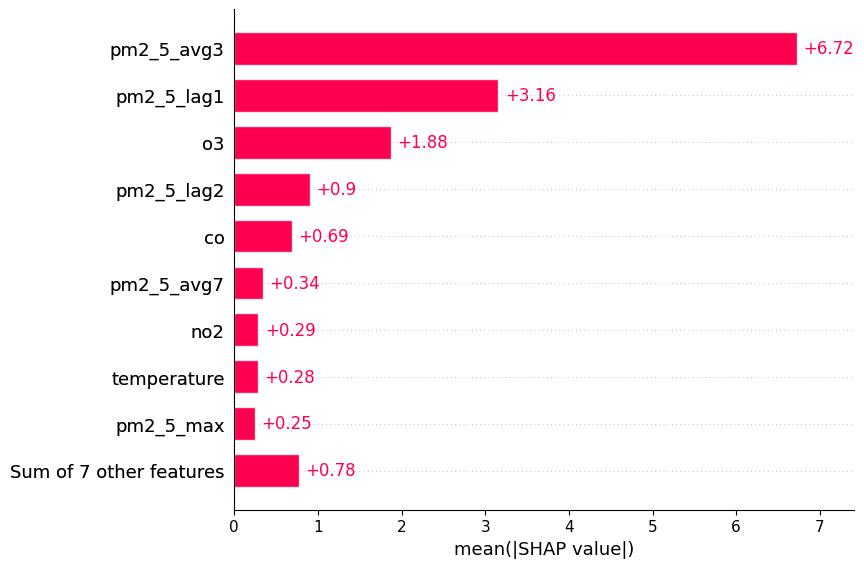

In [ ]:
import shap
explainer = shap.Explainer(xgb_model, X_test)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)
shap.plots.bar(shap_values)

In [ ]:
print(df.head())

                         timestamp  aqius main_pollutant  temperature  \
0 2025-07-04 16:29:03.790679+00:00    159             p2         35.0   
1 2025-07-04 16:31:47.019312+00:00    159             p2         35.0   
2 2025-07-04 16:40:15.156636+00:00    159             p2         35.0   
3 2025-07-04 16:51:12.690482+00:00    159             p2         35.0   
4 2025-07-04 17:18:25.444564+00:00    160             p2         35.0   

   humidity  wind_speed    aqi  pm2_5   pm10   no2     so2  co     no     o3  \
0      49.0        2.39  53.88  76.52  19.32  3.19  775.09   0  78.05  39.08   
1      49.0        2.39  53.62  75.62  18.81  2.88  795.15   0  66.64  35.78   
2      49.0        2.39  53.62  75.62  18.81  2.88  795.15   0  66.64  35.78   
3      49.0        2.39  53.62  75.62  18.81  2.88  795.15   0  66.64  35.78   
4      51.0        3.14  53.62  75.62  18.81  2.88  795.15   0  66.64  35.78   

   hour  dayofweek  target_aqi  
0    16          4       159.0  
1    16       

In [ ]:
#US EPA Formula: AQI

i=135

if i>=0.0 and i<= 9.0:
      BP_low=0.0
      BP_high=9.0
      AQI_low=0
      AQI_high=50
elif i>=9.1 and i<=35.4:
      BP_low=9.1
      BP_high=35.4
      AQI_low=51
      AQI_high=100
elif i>=35.5 and i<=55.4:
      BP_low=35
      BP_high=55.4
      AQI_low=101
      AQI_high=150
elif i>=55.5 and i<=125.4:
      BP_low=55.5
      BP_high=125.4
      AQI_low=151
      AQI_high=200
elif i>=125.5 and i<=225.4:
      BP_low=125.5
      BP_high=225.4
      AQI_low=152
      AQI_high=300
elif i>=225.5 and i<=325.4:
      BP_low=225.5
      BP_high=325.4
      AQI_low=301
      AQI_high=500
AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low
print(AQI)

166.07407407407408


In [ ]:

i=74
if i>=0.0 and i<= 12.0:
      BP_low=0.0
      BP_high=12.0
      AQI_low=0
      AQI_high=50
elif i>=12.1 and i<=35.4:
      BP_low=12.1
      BP_high=35.4
      AQI_low=51
      AQI_high=100
elif i>=35.5 and i<=55.4:
      BP_low=35.5
      BP_high=55.4
      AQI_low=101
      AQI_high=150
elif i>=55.5 and i<=150.4:
      BP_low=55.5
      BP_high=150.4
      AQI_low=151
      AQI_high=200
elif i>=150.5 and i<=250.4:
      BP_low=150.5
      BP_high=250.4
      AQI_low=201
      AQI_high=300
elif i>=250.5 and i<=350.4:
      BP_low=250.5
      BP_high=350.4
      AQI_low=301
      AQI_high=400
elif i>=350.5 and i<=500.4:
      BP_low=350.5
      BP_high=500.4
      AQI_low=401
      AQI_high=500
else:
    aqi.append(None)


AQI=((AQI_high-AQI_low)*(i-BP_low))/(BP_high-BP_low)+AQI_low

print(AQI)

160.55216016859853
